# Projet 4
# Anticipez les besoins en consommation électrique de bâtiments



## Problématique

- Peux-ton prédire à partir des données de consommations annuelles des années 2015 et 2016, les émissions de CO2 et la consommation d'énergie totale?
- Quel est l'intérêt de la modélisation avec ou sans l'ENERGY STAR SCORE?

## Missions

- Réaliser une analyse exploratoire des données;
- Tester différents modèles de prédiction afin de répondre à la problématique;
- Évaluer ces différents modèles de prédiction;
- Évaluer l'intérêt de l'ENERGY STAR SCORE.

## Compétences évaluées

- Mettre en place le modèle d'apprentissage supervisé adapté au problème métier
- Adapter les hyperparamètres d'un algorithme d'apprentissage supervisé afin de l'améliorer
- Évaluer les performances d’un modèle d'apprentissage supervisé
- Transformer les variables pertinentes d'un modèle d'apprentissage supervisé


## 1. Nettoyage des données

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.rcParams["figure.figsize"]=20,20
sns.set_style("white")

In [2]:
data2015 = pd.read_csv('2015-building-energy-benchmarking.csv')

In [3]:
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [4]:
data2015.shape

(3340, 47)

In [5]:
pd.options.display.max_columns = 50
data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [6]:
statList = ['Taille','Nbre ligne','Nbre colonne','Nbre NaN','Pourcentage de NaN']

statsValues = pd.DataFrame(columns=statList)

cleanData = data2015.loc[:, ~data2015.columns.str.contains('^Unnamed')]
    
nbRows = cleanData.shape[0]
nbCols = cleanData.shape[1]
nbNaN = cleanData.isna().sum().sum()
pNaN = round(100.0 * nbNaN/cleanData.size,2)
    
statsValues.loc[0] = [cleanData.size,nbRows,nbCols,nbNaN,pNaN]

statsValues

,Taille,Nbre ligne,Nbre colonne,Nbre NaN,Pourcentage de NaN
0,156980.0,3340.0,47.0,26512.0,16.89


In [7]:
data2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

In [8]:
data2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [9]:
data2016.shape

(3376, 46)

In [10]:
pd.options.display.max_columns = 50
data2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [11]:
statList = ['Taille','Nbre ligne','Nbre colonne','Nbre NaN','Pourcentage de NaN']

statsValues = pd.DataFrame(columns=statList)

cleanData = data2016.loc[:, ~data2016.columns.str.contains('^Unnamed')]
    
nbRows = cleanData.shape[0]
nbCols = cleanData.shape[1]
nbNaN = cleanData.isna().sum().sum()
pNaN = round(100.0 * nbNaN/cleanData.size,2)
    
statsValues.loc[0] = [cleanData.size,nbRows,nbCols,nbNaN,pNaN]

statsValues

,Taille,Nbre ligne,Nbre colonne,Nbre NaN,Pourcentage de NaN
0,155296.0,3376.0,46.0,19952.0,12.85


Affichage des variables présentent dans les données 2015 et qui ne sont pas présentent dans les données 2016

In [12]:
set(data2015.columns) - set(data2016.columns)

{'2010 Census Tracts',
 'City Council Districts',
 'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes'}

Dix (10) variables sont présentes dans les données 2015 mais absentes ou présentes sous une autre forme dans les données 2016.

Affichage des variables présentent dans les données 2016 et qui ne sont pas présentent dans les données 2015

In [13]:
set(data2016.columns) - set(data2015.columns)

{'Address',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

Neuf (9) variables sont présentes dans les données 2016 mais absentes ou présentes sous une autre forme dans les données 2015.

Si nous analysons les différentes variables, nous constatons que:
- Les variables '2010 Census Tracts', 'City Council Districts', 'OtherFuelUse(kBtu)', 'SPD Beats','Seattle Police Department Micro Community Policing Plan Areas' sont spécifiques à la base de données de l'année 2015;
- La 'Comment' est bien présente dans les deux bases de données mais se termine par 's' dans la base 2016 donc nécessite une uniformisation;
- Les variables 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)' sont bien présentent dans les deux bases de données mais avec des notations différentes et sans unités dans la base de données 2016. Elle nécessite également une uniformisation;
- La variable 'Location' est présentée sous forme de dictionnaire et contient les variables {'Address','City', 'Latitude', 'Longitude', 'State', 'ZipCode' de la base 2016. Cette variable nécessite une réécriture.

### Réécriture et suppression de la variable 'Location'

In [14]:
data = data2015[['Location']]

In [15]:
data.head()

,Location
0,"{'latitude': '47.61219025', 'longitude': '-122..."
1,"{'latitude': '47.61310583', 'longitude': '-122..."
2,"{'latitude': '47.61334897', 'longitude': '-122..."
3,"{'latitude': '47.61421585', 'longitude': '-122..."
4,"{'latitude': '47.6137544', 'longitude': '-122...."


In [16]:
import ast

newLocation = pd.DataFrame()
for idx, row in data.iterrows():
    data_dict = ast.literal_eval(row['Location'])
    
    latitude = data_dict['latitude']
    longitude = data_dict['longitude']
    
    human_address = pd.Series(ast.literal_eval(data_dict['human_address']))
    
    cols = ['Latitude','Longitude'] + list(human_address.index.str.capitalize())
    df = pd.DataFrame([[latitude,longitude] + list(human_address)],columns=cols)

    newLocation = newLocation.append(df).reset_index(drop=True)
    
newLocation.head()

,Latitude,Longitude,Address,City,State,Zip
0,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121


In [17]:
data2015[newLocation.columns] = newLocation
data2015.drop('Location',axis=1,inplace=True)
data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Latitude,Longitude,Address,City,State,Zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,...,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,...,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,...,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,...,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,...,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121


### Uniformisation des variables 'Comment','GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)' dans les deux bases de données

In [18]:
data2015.rename(columns={'Comment':'Comments'},inplace=True)

Si nous regardons la définition des différentes variables conténues dans les données ( voir https://data.seattle.gov/dataset/2015-Building-Energy-Benchmarking/h7rm-fz6m pour l'année 2015 et https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy pour l'année 2016), la variable 'GHGEmissions(MetricTonsCO2e)' est équivalente à la variable 'TotalGHGEmissions' et 'GHGEmissionsIntensity(kgCO2e/ft2)' correspond à la variable 'GHGEmissionsIntensity'

In [19]:
data2015['GHGEmissions(MetricTonsCO2e)'].describe()

count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [20]:
data2016['TotalGHGEmissions'].describe()

count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [21]:
data2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe()

count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64

In [22]:
data2016['GHGEmissionsIntensity'].describe()

count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

In [23]:
data2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                         'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity'},inplace=True)

In [24]:
set(data2015.columns) - set(data2016.columns)

{'2010 Census Tracts',
 'City Council Districts',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip',
 'Zip Codes'}

In [25]:
set(data2016.columns) - set(data2015.columns)

{'ZipCode'}

In [26]:
data2015[['Zip','Zip Codes']].head()

,Zip,Zip Codes
0,98101,18081
1,98101,18081
2,98101,18081
3,98101,18081
4,98121,19576


### Traitements des différentes variables

In [27]:
for cols in data2015.columns:
    print(cols,': ',data2015[cols].nunique(),'\n')
    print(data2015[cols].unique())
    print('\n')

OSEBuildingID :  3340 

[    1     2     3 ... 50057 50058 50059]


DataYear :  1 

[2015]


BuildingType :  7 

['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Multifamily LR (1-4)' 'Campus'
 'Multifamily HR (10+)']


PrimaryPropertyType :  27 

['Hotel' 'Other' 'Mid-Rise Multifamily' 'Mixed Use Property' 'K-12 School'
 'College/University' 'Small- and Mid-Sized Office'
 'Self-Storage Facility\n' 'Distribution Center' 'Large Office'
 'Retail Store' 'Low-Rise Multifamily' 'Senior Care Community'
 'Medical Office' 'Hospital' 'Residence Hall/Dormitory'
 'Non-Refrigerated Warehouse' 'Distribution Center\n' 'SPS-District K-12'
 'Worship Facility' 'Supermarket/Grocery Store' 'Laboratory'
 'Self-Storage Facility' 'Refrigerated Warehouse' 'High-Rise Multifamily'
 'Restaurant\n' 'Restaurant']


PropertyName :  3287 

['MAYFLOWER PARK HOTEL' 'PARAMOUNT HOTEL' 'WESTIN HOTEL' ... 'CIRRUS'
 'WEDGEWOOD ESTATES BLDG A' 'WEDGEWOOD ESTATES BLDG B']


TaxParcelIdenti

In [28]:
for cols in data2016.columns:
    print(cols,': ',data2016[cols].nunique(),'\n')
    print(data2016[cols].unique())
    print('\n')

OSEBuildingID :  3376 

[    1     2     3 ... 50224 50225 50226]


DataYear :  1 

[2016]


BuildingType :  8 

['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Campus' 'Multifamily LR (1-4)'
 'Multifamily HR (10+)' 'Nonresidential WA']


PrimaryPropertyType :  24 

['Hotel' 'Other' 'Mid-Rise Multifamily' 'Mixed Use Property' 'K-12 School'
 'University' 'Small- and Mid-Sized Office' 'Self-Storage Facility'
 'Warehouse' 'Large Office' 'Senior Care Community' 'Medical Office'
 'Retail Store' 'Hospital' 'Residence Hall' 'Distribution Center'
 'Worship Facility' 'Low-Rise Multifamily' 'Supermarket / Grocery Store'
 'Laboratory' 'Refrigerated Warehouse' 'Restaurant'
 'High-Rise Multifamily' 'Office']


PropertyName :  3362 

['Mayflower park hotel' 'Paramount Hotel' '5673-The Westin Seattle' ...
 'Queen Anne Pool' 'South Park Community Center'
 'Van Asselt Community Center']


Address :  3354 

['405 Olive way' '724 Pine street' '1900 5th Avenue' ... '192

In [29]:
data2016['PropertyName'] = data2016['PropertyName'].str.upper()
data2016['Neighborhood'] = data2016['Neighborhood'].str.upper()
data2016['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS','DELRIDGE', inplace= True)

In [30]:
data2015['PrimaryPropertyType'] = [prps.replace('\n','') for prps in data2015['PrimaryPropertyType']]
data2016['PrimaryPropertyType'] = [prps.replace('\n','') for prps in data2016['PrimaryPropertyType']]

In [31]:
data2015.min()

OSEBuildingID                                                                     1
DataYear                                                                       2015
BuildingType                                                                 Campus
PrimaryPropertyType                                              College/University
PropertyName                                                        100 ROY ST APTS
CouncilDistrictCode                                                               1
Neighborhood                                                                BALLARD
YearBuilt                                                                      1900
NumberofBuildings                                                                 1
NumberofFloors                                                                    0
PropertyGFATotal                                                              20000
PropertyGFAParking                                                          

In [32]:
data2016.min()

OSEBuildingID                                                1
DataYear                                                  2016
BuildingType                                            Campus
PrimaryPropertyType                        Distribution Center
PropertyName                                  #4706 BITTERLAKE
Address                            (ID23682) 3204 SW MORGAN ST
City                                                   Seattle
State                                                       WA
ZipCode                                                  98006
TaxParcelIdentificationNumber                       0000000000
CouncilDistrictCode                                          1
Neighborhood                                           BALLARD
Latitude                                               47.4992
Longitude                                             -122.414
YearBuilt                                                 1900
NumberofBuildings                                      

#### Suppression des bâtiments pour lesquels les variables 'SiteEnergyUse(kBtu)' et 'TotalGHGEmissions' sont négatives ou nulles

In [33]:
data2015 = data2015[ ~((data2015['SiteEnergyUse(kBtu)'] <= 0) | (data2015['TotalGHGEmissions'] <= 0)) ]
data2016 = data2016[ ~((data2016['SiteEnergyUse(kBtu)'] <= 0) | (data2016['TotalGHGEmissions'] <= 0)) ]

#### Suppression des bâtiments pour lesquels les variables relatives à la surface sont négatives

In [34]:
data2015 = data2015[ ~((data2015['PropertyGFATotal'] < 0) 
                       | (data2015['PropertyGFAParking'] < 0) 
                       | (data2015['PropertyGFABuilding(s)'] < 0) 
                       | (data2015['SecondLargestPropertyUseTypeGFA'] < 0) 
                       | (data2015['ThirdLargestPropertyUseTypeGFA'] < 0)) ]

data2016 = data2016[ ~((data2016['PropertyGFATotal'] < 0) 
                       | (data2016['PropertyGFAParking'] < 0) 
                       | (data2016['PropertyGFABuilding(s)'] < 0) 
                       | (data2016['SecondLargestPropertyUseTypeGFA'] < 0) 
                       | (data2016['ThirdLargestPropertyUseTypeGFA'] < 0)) ]

In [35]:
data2015.dtypes

OSEBuildingID                                                      int64
DataYear                                                           int64
BuildingType                                                      object
PrimaryPropertyType                                               object
PropertyName                                                      object
TaxParcelIdentificationNumber                                     object
CouncilDistrictCode                                                int64
Neighborhood                                                      object
YearBuilt                                                          int64
NumberofBuildings                                                  int64
NumberofFloors                                                   float64
PropertyGFATotal                                                   int64
PropertyGFAParking                                                 int64
PropertyGFABuilding(s)                             

In [36]:
for cols in data2015.columns:
    print(cols,': ',data2015[cols].nunique(),'\n')
    print(data2015[cols].unique())
    print('\n')

OSEBuildingID :  3334 

[    1     2     3 ... 50057 50058 50059]


DataYear :  1 

[2015]


BuildingType :  7 

['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Multifamily LR (1-4)' 'Campus'
 'Multifamily HR (10+)']


PrimaryPropertyType :  24 

['Hotel' 'Other' 'Mid-Rise Multifamily' 'Mixed Use Property' 'K-12 School'
 'College/University' 'Small- and Mid-Sized Office'
 'Self-Storage Facility' 'Distribution Center' 'Large Office'
 'Low-Rise Multifamily' 'Senior Care Community' 'Medical Office'
 'Retail Store' 'Hospital' 'Residence Hall/Dormitory'
 'Non-Refrigerated Warehouse' 'SPS-District K-12' 'Worship Facility'
 'Supermarket/Grocery Store' 'Laboratory' 'Refrigerated Warehouse'
 'High-Rise Multifamily' 'Restaurant']


PropertyName :  3281 

['MAYFLOWER PARK HOTEL' 'PARAMOUNT HOTEL' 'WESTIN HOTEL' ... 'CIRRUS'
 'WEDGEWOOD ESTATES BLDG A' 'WEDGEWOOD ESTATES BLDG B']


TaxParcelIdentificationNumber :  3241 

['659000030' '659000220' '659000475' ... 

['405 OLIVE WAY' '724 PINE ST' '1900 5TH AVE' ... '2030 8TH AVE'
 '3801 NE 77TH ST' '7540 37TH AVE NE']


City :  1 

['SEATTLE']


State :  1 

['WA']


Zip :  28 

['98101' '98121' '98104' '98118' '98105' '98112' '98125' '98109' '98103'
 '98199' '98115' '98107' '98144' '98119' '98122' '98126' '98133' '98146'
 '98106' '98108' '98134' '98117' '98136' '98116' '98177' '98102' '98155'
 '98178']




### Catégorisation des types d'utilisation des bâtiments à partir de la variables 'ListOfAllPropertyUseTypes'

In [37]:
#catColumns2015 = []
#catColumns2016 = []

#for usetyp in data2015['ListOfAllPropertyUseTypes']:
#    try:
#        useList = usetyp.split(",")
#        for iUse in useList:
#            catColumns2015.append(iUse.strip(" "))
#    except:
#        print('Failure')
#    
#catColumns2015 = pd.DataFrame(catColumns2015,columns=['usetype'])

#for usetyp in data2016['ListOfAllPropertyUseTypes']:
#    try:
#        useList = usetyp.split(",")
#        for iUse in useList:
#            catColumns2016.append(iUse.strip(" "))
#    except:
#        print('Failure')
#    
#catColumns2016 = pd.DataFrame(catColumns2016,columns=['usetype'])

#catColumns = pd.concat([catColumns2015,catColumns2016])
#catColumns['usetype'].unique()

In [38]:
#useTypes = {
#    'Hotel' : 'Housing', 
#    'Multifamily Housing' : 'Housing',
#    'Senior Care Community' : 'Housing',
#    'Other - Lodging/Residential' : 'Housing',
#    'Residence Hall/Dormitory' : 'Housing',
#    'Residential Care Facility' : 'Housing',
#    'Single Family Home' : 'Housing',
#    
#    'Restaurant' : 'Hobby',
#    'Fast Food Restaurant' : 'Hobby',
#    'Other - Restaurant/Bar' : 'Hobby',
#    'Swimming Pool' : 'Hobby',
#    'Fitness Center/Health Club/Gym' : 'Hobby',
#    'Other - Entertainment/Public Assembly' : 'Hobby',
#    'Museum' : 'Hobby',
#    'Food Service' : 'Hobby',
#    'Movie Theater' : 'Hobby',
#    'Social/Meeting Hall' : 'Hobby',
#    'Other - Recreation' : 'Hobby',
#    'Bar/Nightclub' : 'Hobby',
#    'Lifestyle Center' : 'Hobby',
#    'Food Sales' : 'Hobby',
#    'Worship Facility' : 'Hobby',
#    'Self-Storage Facility' : 'Hobby',
#    'Personal Services (Health/Beauty, Dry Cleaning, etc)' : 'Hobby',
#    'Convention Center' : 'Hobby',
#    'Performing Arts' : 'Hobby',
#    
#    'K-12 School' : 'Education',
#    'College/University' : 'Education',
#    'Other - Education' : 'Education',
#    'Vocational School' : 'Education',
#    'Pre-school/Daycare' : 'Education',
#    'Adult Education' : 'Education',
#    'Library' : 'Education',
#    'Other - Technology/Science' : 'Education',
#    
#    'Parking' : 'Retail',
#    'Retail Store' : 'Retail',
#    'Supermarket/Grocery Store' : 'Retail',
#    'Enclosed Mall' : 'Retail',
#    'Repair Services (Vehicle, Shoe, Locksmith, etc)' : 'Retail',
#    'Automobile Dealership' : 'Retail',
#    'Strip Mall' : 'Retail',
#    'Wholesale Club/Supercenter' : 'Retail',
#    'Other - Mall' : 'Retail',
#    'Convenience Store without Gas Station' : 'Retail',
#    'Manufacturing/Industrial Plant' : 'Retail',
#    
#    'Hospital (General Medical & Surgical)' : 'Health',
#    'Other/Specialty Hospital' : 'Health',
#    'Urgent Care/Clinic/Other Outpatient' : 'Health',
#    'Outpatient Rehabilitation/Physical Therapy' : 'Health',
#    'Medical Office' : 'Health',
#    
#    'Bank Branch' : 'Office',
#    'Other - Public Services' : 'Office',
#    'Police Station' : 'Office',
#    'Office' : 'Office',
#    'Financial Office' : 'Office',
#    'Courthouse' : 'Office',
#    'Prison/Incarceration' : 'Office',
#    'Energy/Power Station' : 'Office',
#    'Other - Services' : 'Office',
#    'Fire Station' : 'Office',
#
#}
#
#for cols in ['PrimaryPropertyType','LargestPropertyUseType','SecondLargestPropertyUseType',
#             'ThirdLargestPropertyUseType']:
#    data2015[cols] = data2015[cols].replace(useTypes)
#    
#for cols in ['PrimaryPropertyType','LargestPropertyUseType','SecondLargestPropertyUseType',
#             'ThirdLargestPropertyUseType']:
#    data2016[cols] = data2016[cols].replace(useTypes)

In [39]:
for cols in ['PrimaryPropertyType','LargestPropertyUseType','SecondLargestPropertyUseType',
             'ThirdLargestPropertyUseType']:
    print(cols,':\n')
    print(data2015[cols].value_counts())
    print('\n')

PrimaryPropertyType :

Low-Rise Multifamily           998
Mid-Rise Multifamily           538
Small- and Mid-Sized Office    295
Other                          257
Non-Refrigerated Warehouse     187
Large Office                   170
K-12 School                    136
Mixed Use Property             126
High-Rise Multifamily          103
Retail Store                    99
Hotel                           73
Worship Facility                72
Distribution Center             53
Medical Office                  43
Senior Care Community           43
Supermarket/Grocery Store       36
Self-Storage Facility           28
College/University              22
Residence Hall/Dormitory        15
Refrigerated Warehouse          13
Restaurant                      12
Hospital                        10
SPS-District K-12                4
Laboratory                       1
Name: PrimaryPropertyType, dtype: int64


LargestPropertyUseType :

Multifamily Housing                                     1597
Office  

In [40]:
data2015['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'College/University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Distribution Center', 'Large Office',
       'Low-Rise Multifamily', 'Senior Care Community', 'Medical Office',
       'Retail Store', 'Hospital', 'Residence Hall/Dormitory',
       'Non-Refrigerated Warehouse', 'SPS-District K-12',
       'Worship Facility', 'Supermarket/Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'High-Rise Multifamily', 'Restaurant'],
      dtype=object)

Les variables 'DefaultData', 'Latitude','Longitude' et 'ZipCode' ne possèdent pas les mêmes types. Il faut donc les convertir

In [41]:
data2015['DefaultData'].unique()

array(['No', 'Yes', nan], dtype=object)

In [42]:
data2015['DefaultData'] = data2015['DefaultData'].map({'Yes' : True,'No' : False})
#data2015.head()

In [43]:
data2015.dtypes

OSEBuildingID                                                      int64
DataYear                                                           int64
BuildingType                                                      object
PrimaryPropertyType                                               object
PropertyName                                                      object
TaxParcelIdentificationNumber                                     object
CouncilDistrictCode                                                int64
Neighborhood                                                      object
YearBuilt                                                          int64
NumberofBuildings                                                  int64
NumberofFloors                                                   float64
PropertyGFATotal                                                   int64
PropertyGFAParking                                                 int64
PropertyGFABuilding(s)                             

In [44]:
data2016.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [45]:
data2015['Latitude'] = data2015['Latitude'].astype('float64')
data2015['Longitude'] = data2015['Longitude'].astype('float64')

In [46]:
data2015.dtypes

OSEBuildingID                                                      int64
DataYear                                                           int64
BuildingType                                                      object
PrimaryPropertyType                                               object
PropertyName                                                      object
TaxParcelIdentificationNumber                                     object
CouncilDistrictCode                                                int64
Neighborhood                                                      object
YearBuilt                                                          int64
NumberofBuildings                                                  int64
NumberofFloors                                                   float64
PropertyGFATotal                                                   int64
PropertyGFAParking                                                 int64
PropertyGFABuilding(s)                             

### Traitement des valeurs manquantes

In [47]:
data2015[['SecondLargestPropertyUseType','ThirdLargestPropertyUseType']] = data2015[['SecondLargestPropertyUseType','ThirdLargestPropertyUseType']].fillna('unUse')
data2015[['SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']] = data2015[['SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']].fillna(0)
data2015[['NumberofBuildings','NumberofFloors']] = data2015[['NumberofBuildings','NumberofFloors']].fillna(1)

data2015.isna().sum()


OSEBuildingID                                                       0
DataYear                                                            0
BuildingType                                                        0
PrimaryPropertyType                                                 0
PropertyName                                                        0
TaxParcelIdentificationNumber                                       2
CouncilDistrictCode                                                 0
Neighborhood                                                        0
YearBuilt                                                           0
NumberofBuildings                                                   0
NumberofFloors                                                      0
PropertyGFATotal                                                    0
PropertyGFAParking                                                  0
PropertyGFABuilding(s)                                              0
ListOfAllPropertyUse

In [48]:
data2016[['SecondLargestPropertyUseType','ThirdLargestPropertyUseType']] = data2016[['SecondLargestPropertyUseType','ThirdLargestPropertyUseType']].fillna('unUse')
data2016[['SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']] = data2016[['SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']].fillna(0)
data2016[['NumberofBuildings','NumberofFloors']] = data2016[['NumberofBuildings','NumberofFloors']].fillna(1)

data2016.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType          0
SecondLargestPropertyUseTypeGFA       0


### Sélection des colonnes

In [49]:
# List des colonnes à supprimer
data2015.rename(columns={'Zip':'ZipCode'},inplace=True)

deleteColumns = ['Comments','Zip Codes','2010 Census Tracts','City Council Districts',
                 'SPD Beats','Seattle Police Department Micro Community Policing Plan Areas',
                 'PropertyName', 'TaxParcelIdentificationNumber','CouncilDistrictCode',
                 'ListOfAllPropertyUseTypes','YearsENERGYSTARCertified','SPD Beats','SiteEUI(kBtu/sf)',
                 'SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)',
                 'SteamUse(kBtu)','Electricity(kWh)','Electricity(kBtu)','NaturalGas(therms)','NaturalGas(kBtu)',
                 'OtherFuelUse(kBtu)','GHGEmissionsIntensity','DefaultData',
                 'ComplianceStatus','Outlier','Address','City','State','ZipCode']

for cols in deleteColumns:
    try:
        data2015.drop(cols,axis=1,inplace=True)
        data2016.drop(cols,axis=1,inplace=True)
    except:
        print(cols, 'is not in cleanned data')

Zip Codes is not in cleanned data
2010 Census Tracts is not in cleanned data
City Council Districts is not in cleanned data
SPD Beats is not in cleanned data
Seattle Police Department Micro Community Policing Plan Areas is not in cleanned data
SPD Beats is not in cleanned data
OtherFuelUse(kBtu) is not in cleanned data


In [50]:
data2015.isna().sum()

OSEBuildingID                        0
DataYear                             0
BuildingType                         0
PrimaryPropertyType                  0
Neighborhood                         0
YearBuilt                            0
NumberofBuildings                    0
NumberofFloors                       0
PropertyGFATotal                     0
PropertyGFAParking                   0
PropertyGFABuilding(s)               0
LargestPropertyUseType             136
LargestPropertyUseTypeGFA          136
SecondLargestPropertyUseType         0
SecondLargestPropertyUseTypeGFA      0
ThirdLargestPropertyUseType          0
ThirdLargestPropertyUseTypeGFA       0
ENERGYSTARScore                    777
SiteEnergyUse(kBtu)                 10
TotalGHGEmissions                   10
Latitude                             0
Longitude                            0
dtype: int64

In [51]:
data2016.isna().sum()

OSEBuildingID                        0
DataYear                             0
BuildingType                         0
PrimaryPropertyType                  0
Neighborhood                         0
Latitude                             0
Longitude                            0
YearBuilt                            0
NumberofBuildings                    0
NumberofFloors                       0
PropertyGFATotal                     0
PropertyGFAParking                   0
PropertyGFABuilding(s)               0
LargestPropertyUseType              20
LargestPropertyUseTypeGFA           20
SecondLargestPropertyUseType         0
SecondLargestPropertyUseTypeGFA      0
ThirdLargestPropertyUseType          0
ThirdLargestPropertyUseTypeGFA       0
ENERGYSTARScore                    826
SiteEnergyUse(kBtu)                  5
TotalGHGEmissions                    9
dtype: int64

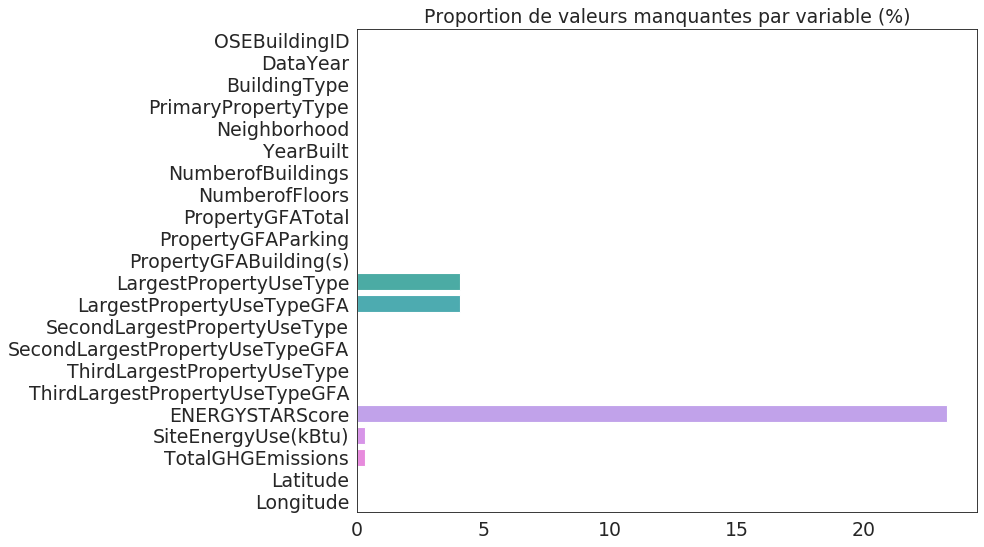

In [52]:
fig,ax = plt.subplots(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

g = sns.barplot(x=data2015.isna().sum()/data2015.shape[0] * 100, y=data2015.columns,ax=ax)


plt.title('Proportion de valeurs manquantes par variable (%)',fontsize=17)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.show()

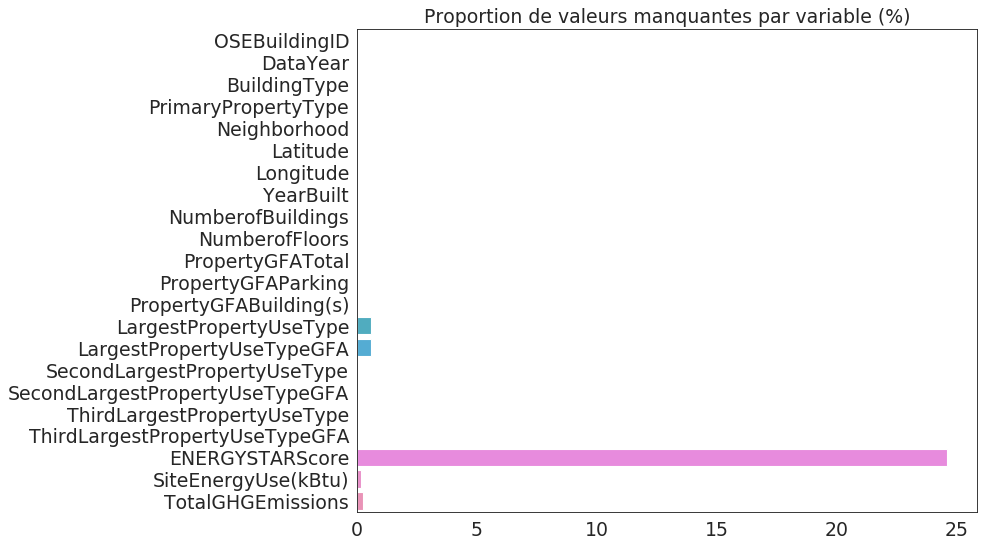

In [53]:
fig,ax = plt.subplots(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

g = sns.barplot(x=data2016.isna().sum()/data2016.shape[0] * 100, y=data2016.columns,ax=ax)


plt.title('Proportion de valeurs manquantes par variable (%)',fontsize=17)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.show()

In [54]:
set(data2015.columns) - set(data2016.columns)

set()

In [55]:
set(data2016.columns) - set(data2015.columns)

set()

In [56]:
statList = ['Taille','Nbre ligne','Nbre colonne','Nbre NaN','Pourcentage de NaN']

statsValues = pd.DataFrame(columns=statList)

cleanData = data2015.loc[:, ~data2015.columns.str.contains('^Unnamed')]
    
nbRows = cleanData.shape[0]
nbCols = cleanData.shape[1]
nbNaN = cleanData.isna().sum().sum()
pNaN = round(100.0 * nbNaN/cleanData.size,2)
    
statsValues.loc[0] = [cleanData.size,nbRows,nbCols,nbNaN,pNaN]

statsValues

,Taille,Nbre ligne,Nbre colonne,Nbre NaN,Pourcentage de NaN
0,73348.0,3334.0,22.0,1069.0,1.46


In [57]:
statList = ['Taille','Nbre ligne','Nbre colonne','Nbre NaN','Pourcentage de NaN']

statsValues = pd.DataFrame(columns=statList)

cleanData = data2016.loc[:, ~data2016.columns.str.contains('^Unnamed')]
    
nbRows = cleanData.shape[0]
nbCols = cleanData.shape[1]
nbNaN = cleanData.isna().sum().sum()
pNaN = round(100.0 * nbNaN/cleanData.size,2)
    
statsValues.loc[0] = [cleanData.size,nbRows,nbCols,nbNaN,pNaN]

statsValues

,Taille,Nbre ligne,Nbre colonne,Nbre NaN,Pourcentage de NaN
0,73810.0,3355.0,22.0,880.0,1.19


### Traitement des valeurs abérrantes

In [58]:
data2015.dropna(how='any', inplace=True)
data2016.dropna(how='any', inplace=True)
data2015.isna().sum().sum()

0

#### Methode du z-score

In [59]:
zSEU2015 = np.abs(stats.zscore(data2015['SiteEnergyUse(kBtu)']))
zSEU2016 = np.abs(stats.zscore(data2016['SiteEnergyUse(kBtu)']))
zTGE2015 = np.abs(stats.zscore(data2015['TotalGHGEmissions']))
zTGE2016 = np.abs(stats.zscore(data2016['TotalGHGEmissions']))

In [60]:
pd.options.display.max_columns = 20
pd.options.display.max_rows = 100
data2015[ (zSEU2015 > 3) | (zTGE2015 > 3) ]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude
2,3,2015,NonResidential,Hotel,DOWNTOWN,1969,1,41.0,961990,0,...,757243.0,Parking,100000.0,Swimming Pool,0.0,18.0,73130656.0,2061.48,47.613349,-122.337699
3,5,2015,NonResidential,Hotel,DOWNTOWN,1926,1,10.0,61320,0,...,61320.0,unUse,0.0,unUse,0.0,1.0,28229320.0,1936.34,47.614216,-122.336609
20,26,2015,NonResidential,Other,DOWNTOWN,1916,1,10.0,540360,0,...,537150.0,unUse,0.0,unUse,0.0,67.0,53332648.0,1596.08,47.602646,-122.330528
49,63,2015,NonResidential,Hotel,DOWNTOWN,1982,1,34.0,994212,146694,...,994212.0,Parking,117668.0,Swimming Pool,0.0,60.0,85357952.0,2846.07,47.611020,-122.333534
59,84,2015,NonResidential,Senior Care Community,SOUTHWEST,1922,1,5.0,217603,0,...,296313.0,Parking,0.0,unUse,0.0,50.0,45494324.0,1858.84,47.558374,-122.378518
98,147,2015,NonResidential,Hospital,BALLARD,1954,1,5.0,285333,0,...,302661.0,Parking,148865.0,unUse,0.0,28.0,63362516.0,1874.42,47.667427,-122.379616
123,198,2015,NonResidential,Hospital,NORTHEAST,1953,1,10.0,879000,0,...,879000.0,unUse,0.0,unUse,0.0,13.0,251191824.0,8046.70,47.663567,-122.281383
167,268,2015,NonResidential,Hospital,CENTRAL,1990,1,5.0,597519,0,...,601615.0,Parking,48607.0,unUse,0.0,45.0,137635696.0,4725.43,47.607107,-122.310783
170,276,2015,NonResidential,Hospital,EAST,2000,1,8.0,1158691,0,...,1350182.0,Parking,387651.0,unUse,0.0,30.0,295812640.0,10780.64,47.603871,-122.322700
231,353,2015,NonResidential,Large Office,DOWNTOWN,1969,1,49.0,1123435,368980,...,808980.0,Parking,232248.0,Other,30329.0,88.0,47148456.0,704.76,47.606337,-122.333692


#### Méthode de l'interquartile (IQR)

In [61]:
Q1SEU = data2015['SiteEnergyUse(kBtu)'].quantile(0.25)
Q3SEU = data2015['SiteEnergyUse(kBtu)'].quantile(0.75)

Q1TGE = data2015['TotalGHGEmissions'].quantile(0.25)
Q3TGE = data2015['TotalGHGEmissions'].quantile(0.75)

iqrSEU2015 = Q3SEU - Q1SEU
iqrTGE2015 = Q3TGE - Q1TGE


In [62]:
pd.options.display.max_columns = 20
pd.options.display.max_rows = 300

data2015[ (data2015['SiteEnergyUse(kBtu)'] < (Q1SEU - 1.5 * iqrSEU2015)) 
         | (data2015['SiteEnergyUse(kBtu)'] > (Q3SEU + 1.5 * iqrSEU2015)) 
         | (data2015['TotalGHGEmissions'] < (Q1TGE - 1.5 * iqrTGE2015)) 
         | (data2015['TotalGHGEmissions'] > (Q1TGE + 1.5 * iqrTGE2015))]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude
0,1,2015,NonResidential,Hotel,DOWNTOWN,1927,1,12.0,88434,0,...,88434.0,unUse,0.0,unUse,0.0,65.0,6981428.0,249.43,47.612190,-122.337997
1,2,2015,NonResidential,Hotel,DOWNTOWN,1996,1,11.0,103566,15064,...,83880.0,Parking,15064.0,Restaurant,4622.0,51.0,8354235.0,263.51,47.613106,-122.333358
2,3,2015,NonResidential,Hotel,DOWNTOWN,1969,1,41.0,961990,0,...,757243.0,Parking,100000.0,Swimming Pool,0.0,18.0,73130656.0,2061.48,47.613349,-122.337699
3,5,2015,NonResidential,Hotel,DOWNTOWN,1926,1,10.0,61320,0,...,61320.0,unUse,0.0,unUse,0.0,1.0,28229320.0,1936.34,47.614216,-122.336609
4,8,2015,NonResidential,Hotel,DOWNTOWN,1980,1,18.0,119890,12460,...,123445.0,Parking,68009.0,Swimming Pool,0.0,67.0,14829099.0,507.70,47.613754,-122.340924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,49992,2015,Multifamily HR (10+),High-Rise Multifamily,DOWNTOWN,2014,1,26.0,619416,128823,...,430927.0,Parking,128823.0,Retail Store,16103.0,94.0,21346100.0,587.09,47.597851,-122.332268
3316,49994,2015,Multifamily HR (10+),High-Rise Multifamily,DOWNTOWN,2014,1,26.0,269065,75138,...,193927.0,Parking,75138.0,unUse,0.0,97.0,7335341.0,166.37,47.616760,-122.348877
3321,50001,2015,Multifamily MR (5-9),Mid-Rise Multifamily,EAST,2013,1,7.0,118800,30345,...,80262.0,Parking,30528.0,unUse,0.0,96.0,3744483.0,126.55,47.614967,-122.314593
3326,50016,2015,Multifamily MR (5-9),Mid-Rise Multifamily,BALLARD,2014,1,7.0,418285,129196,...,418277.0,Parking,127633.0,unUse,0.0,100.0,7641887.0,145.88,47.669231,-122.388550


#### Choix de la méthode de traitement des valeurs abérrantes

In [63]:
#data2015 = data2015[ ~((data2015['SiteEnergyUse(kBtu)'] < (Q1SEU - 1.5 * iqrSEU2015)) 
#                    | (data2015['SiteEnergyUse(kBtu)'] > (Q3SEU + 1.5 * iqrSEU2015)) 
#                    | (data2015['TotalGHGEmissions'] < (Q1TGE - 1.5 * iqrTGE2015)) 
#                    | (data2015['TotalGHGEmissions'] > (Q1TGE + 1.5 * iqrTGE2015)))]

In [64]:
data2015 = data2015[ (zSEU2015 < 3) | (zTGE2015 < 3) ]
data2016 = data2016[ (zSEU2016 < 3) | (zTGE2016 < 3) ]

In [65]:
data2015.dropna(how='any', inplace=True)
data2016.dropna(how='any', inplace=True)
data2015.isna().sum().sum()

0

In [66]:
data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude
0,1,2015,NonResidential,Hotel,DOWNTOWN,1927,1,12.0,88434,0,...,88434.0,unUse,0.0,unUse,0.0,65.0,6981428.0,249.43,47.612190,-122.337997
1,2,2015,NonResidential,Hotel,DOWNTOWN,1996,1,11.0,103566,15064,...,83880.0,Parking,15064.0,Restaurant,4622.0,51.0,8354235.0,263.51,47.613106,-122.333358
3,5,2015,NonResidential,Hotel,DOWNTOWN,1926,1,10.0,61320,0,...,61320.0,unUse,0.0,unUse,0.0,1.0,28229320.0,1936.34,47.614216,-122.336609
4,8,2015,NonResidential,Hotel,DOWNTOWN,1980,1,18.0,119890,12460,...,123445.0,Parking,68009.0,Swimming Pool,0.0,67.0,14829099.0,507.70,47.613754,-122.340924
6,10,2015,NonResidential,Hotel,DOWNTOWN,1926,1,11.0,83008,0,...,81352.0,unUse,0.0,unUse,0.0,25.0,6252842.0,208.46,47.614114,-122.332741


In [67]:
statList = ['Taille','Nbre ligne','Nbre colonne','Nbre NaN','Pourcentage de NaN']

statsValues = pd.DataFrame(columns=statList)

cleanData = data2015.loc[:, ~data2015.columns.str.contains('^Unnamed')]
    
nbRows = cleanData.shape[0]
nbCols = cleanData.shape[1]
nbNaN = cleanData.isna().sum().sum()
pNaN = round(100.0 * nbNaN/cleanData.size,2)
    
statsValues.loc[0] = [cleanData.size,nbRows,nbCols,nbNaN,pNaN]

statsValues

,Taille,Nbre ligne,Nbre colonne,Nbre NaN,Pourcentage de NaN
0,53526.0,2433.0,22.0,0.0,0.0


In [68]:
statList = ['Taille','Nbre ligne','Nbre colonne','Nbre NaN','Pourcentage de NaN']

statsValues = pd.DataFrame(columns=statList)

cleanData = data2016.loc[:, ~data2016.columns.str.contains('^Unnamed')]
    
nbRows = cleanData.shape[0]
nbCols = cleanData.shape[1]
nbNaN = cleanData.isna().sum().sum()
pNaN = round(100.0 * nbNaN/cleanData.size,2)
    
statsValues.loc[0] = [cleanData.size,nbRows,nbCols,nbNaN,pNaN]

statsValues

,Taille,Nbre ligne,Nbre colonne,Nbre NaN,Pourcentage de NaN
0,55154.0,2507.0,22.0,0.0,0.0


## 2. Exploration des données

### 2.1 Analyse des variables qualitatives

#### Analyse univariée des variables qualitatives

In [69]:
data2015['BuildingType'].nunique()

7

In [70]:
sampleSize = data2015['BuildingType'].value_counts().sort_values(ascending=True)
sampleSize = pd.DataFrame(sampleSize).rename(columns={'BuildingType':'Size'})


sampleSize['frequency'] = [i*100/sampleSize['Size'].sum() for i in sampleSize['Size']]
sampleSize['cum. frequency'] = sampleSize['frequency'].cumsum()

#pd.options.display.float_format = '{:.1f}%'.format
sampleSize

,Size,frequency,cum. frequency
Campus,4,0.164406,0.164406
Nonresidential COS,9,0.369914,0.534320
SPS-District K-12,87,3.575832,4.110152
Multifamily HR (10+),89,3.658035,7.768187
Multifamily MR (5-9),438,18.002466,25.770654
Multifamily LR (1-4),855,35.141800,60.912454
NonResidential,951,39.087546,100.000000


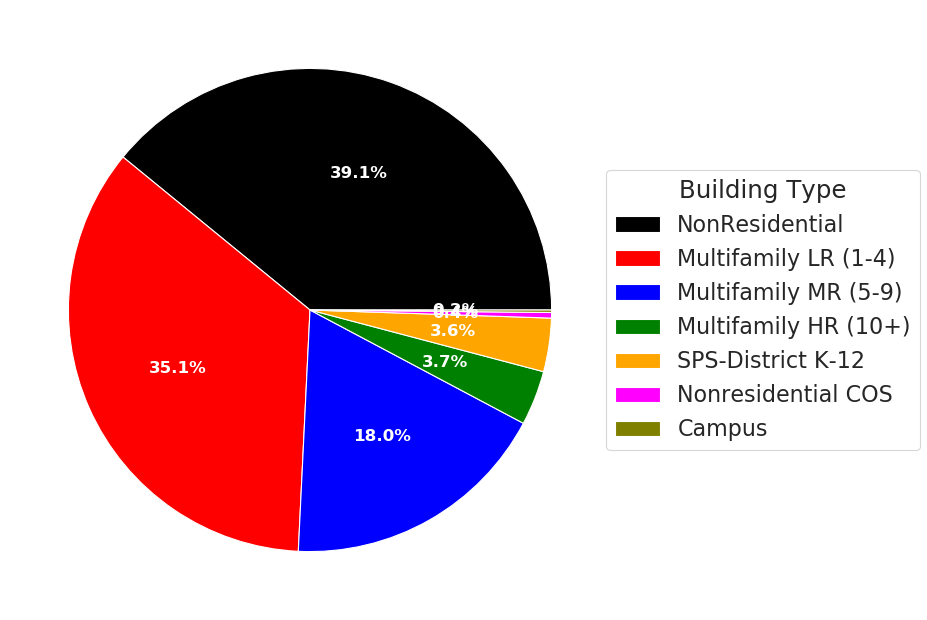

In [71]:
fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

colors = ['black', 'red', 'blue', 'green', 'orange','fuchsia','olive','gold','brown']

wedges, texts, autotexts = ax.pie(data2015['BuildingType'].value_counts(),
                                   autopct=lambda pct: func(pct, data2015['BuildingType'].value_counts())
                                   ,colors=colors,textprops=dict(color="w"))

ax.legend(wedges, data2015['BuildingType'].value_counts().index,
          title="Building Type",
          title_fontsize=22,
          loc="center",
          fontsize = 20,
          bbox_to_anchor=(1.0, 0, 0.5, 1))

#ax.set_title('Composition of groups',fontsize=20)

plt.setp(autotexts, size=15, weight="bold")
plt.savefig('building_type_repartition.png',bbox_inches="tight")
plt.show()

In [72]:
data2015['PrimaryPropertyType'].nunique()

20

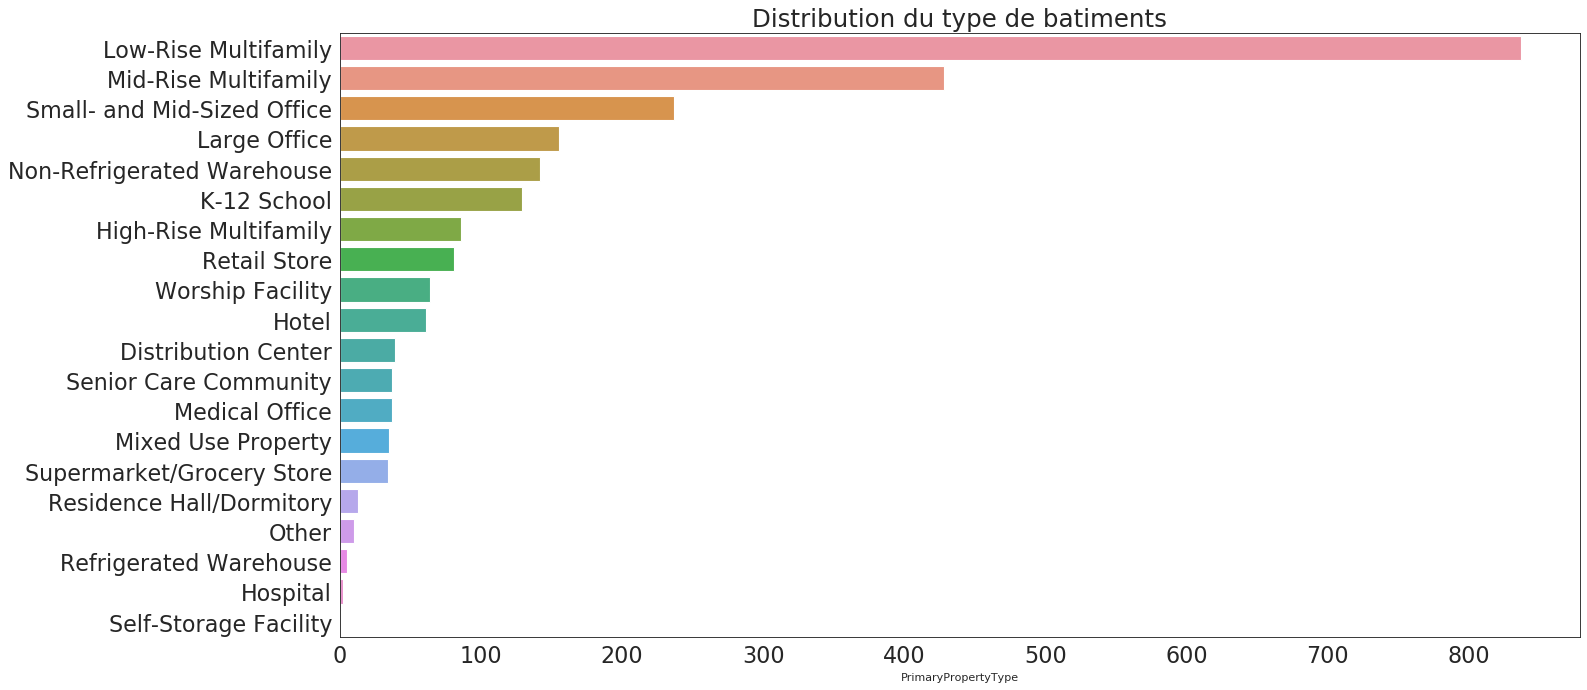

In [104]:
fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

sampleSize = data2015['PrimaryPropertyType'].value_counts()

g = sns.barplot(x=sampleSize, y=sampleSize.index,ax=ax)


plt.title("Distribution du type de batiments",fontsize=22)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [105]:
data2015['LargestPropertyUseType'].nunique()

24

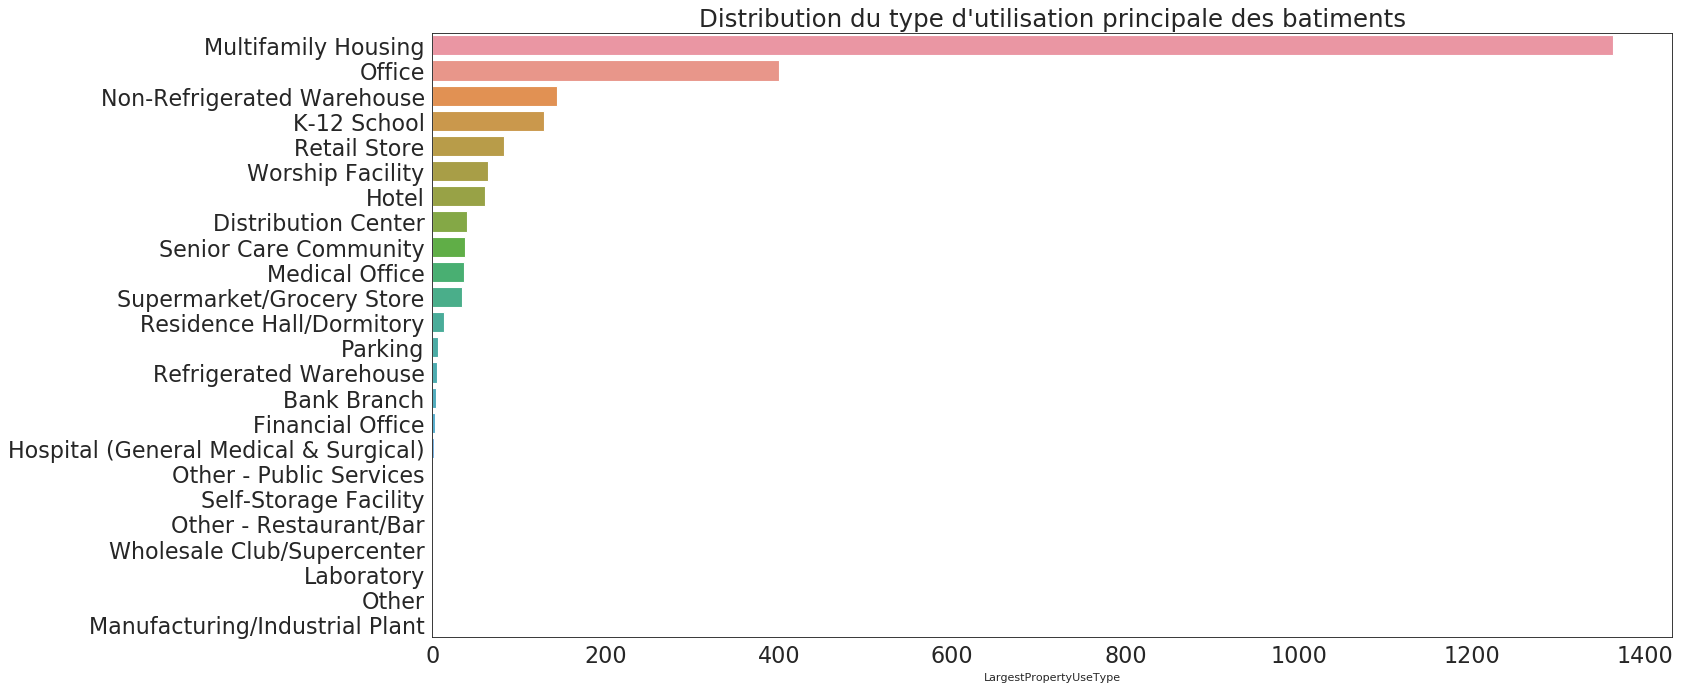

In [106]:
fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

sampleSize = data2015['LargestPropertyUseType'].value_counts()

g = sns.barplot(x=sampleSize, y=sampleSize.index,ax=ax)


plt.title("Distribution du type d'utilisation principale des batiments",fontsize=22)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [74]:
data2015['SecondLargestPropertyUseType'].nunique()

36

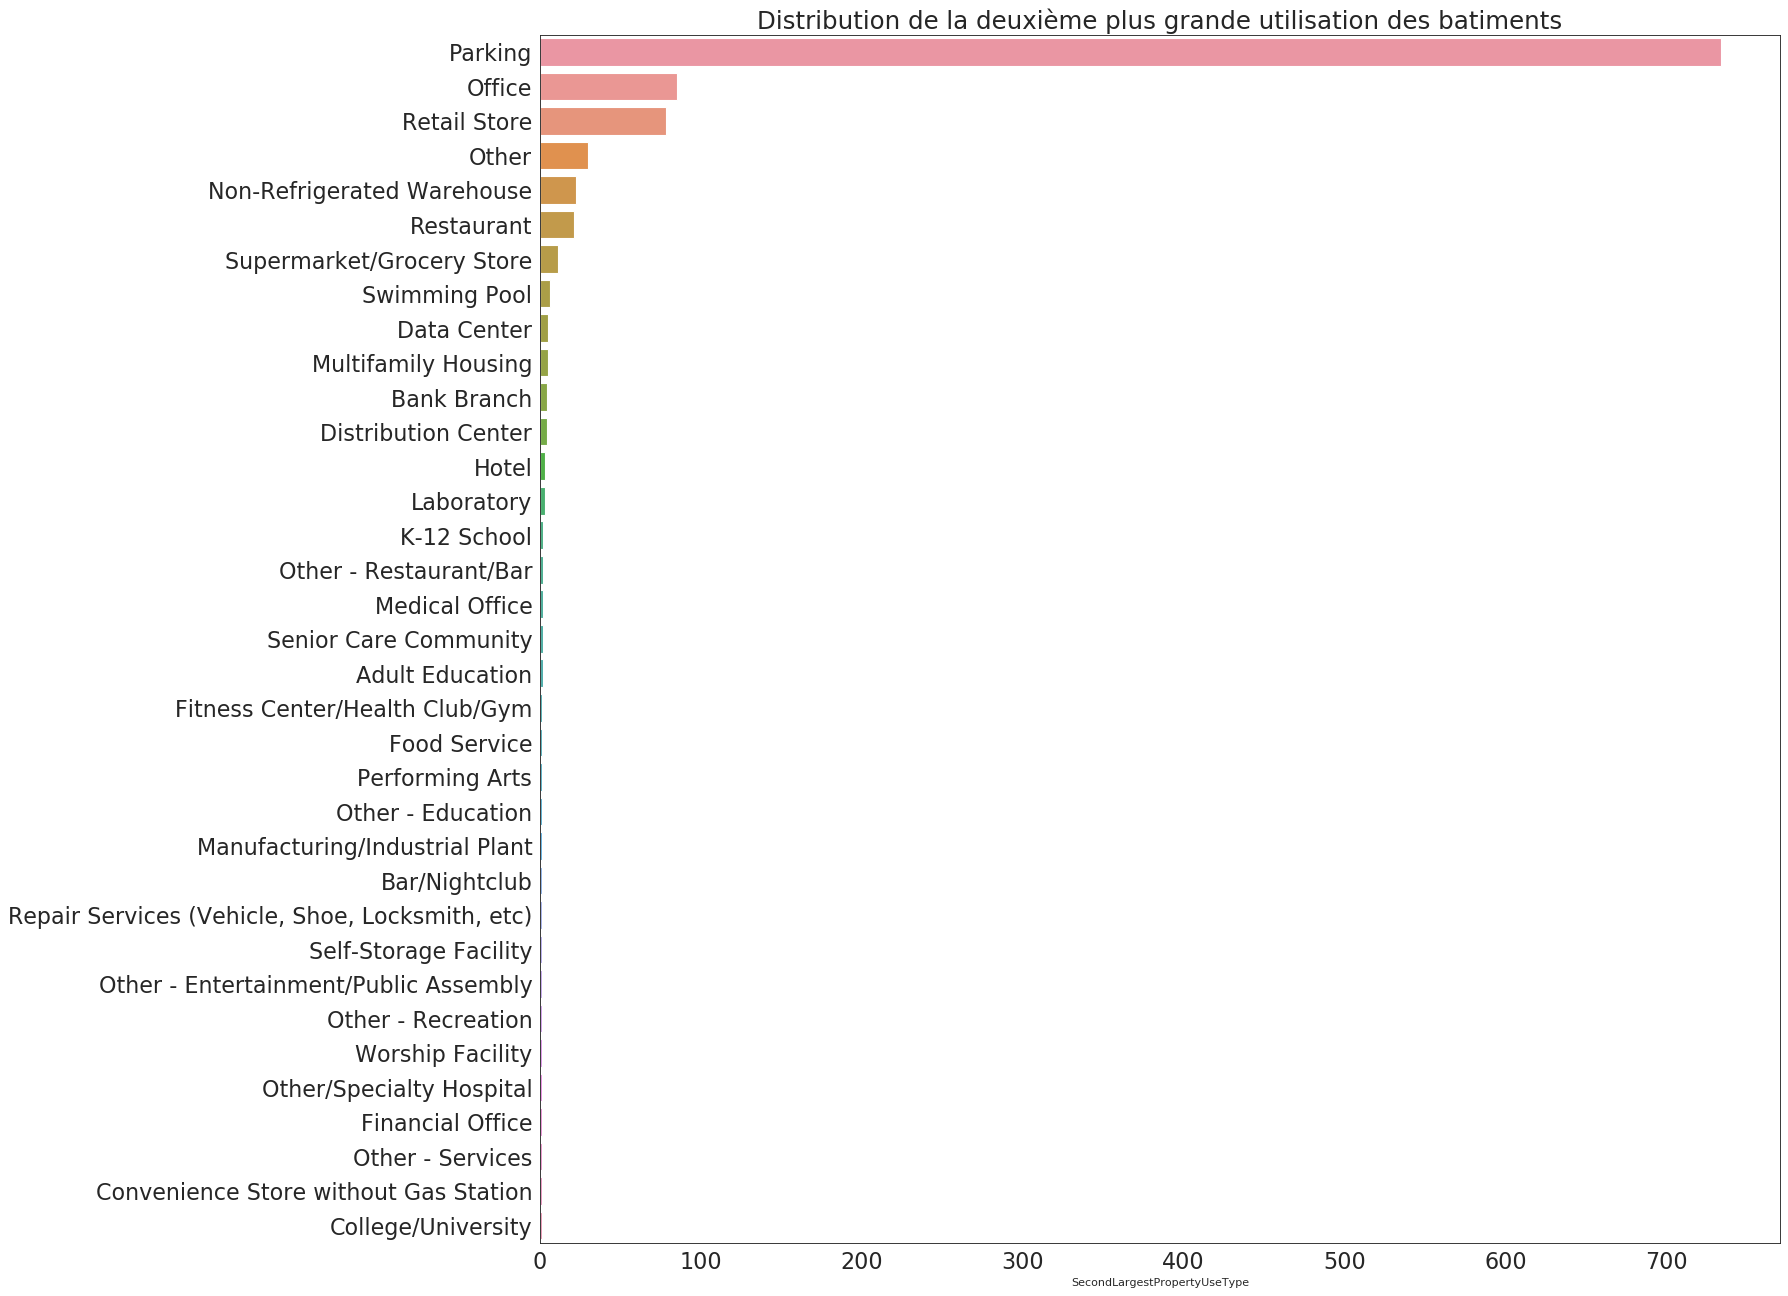

In [75]:
fig,ax = plt.subplots(figsize=(20, 20), dpi= 80, facecolor='w', edgecolor='k')

sampleSize = data2015[data2015['SecondLargestPropertyUseType'] != 'unUse']

g = sns.barplot(x=sampleSize['SecondLargestPropertyUseType'].value_counts(), 
                y=sampleSize['SecondLargestPropertyUseType'].value_counts().index,ax=ax)


plt.title("Distribution de la deuxième plus grande utilisation des batiments",fontsize=22)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [76]:
data2015['ThirdLargestPropertyUseType'].nunique()

38

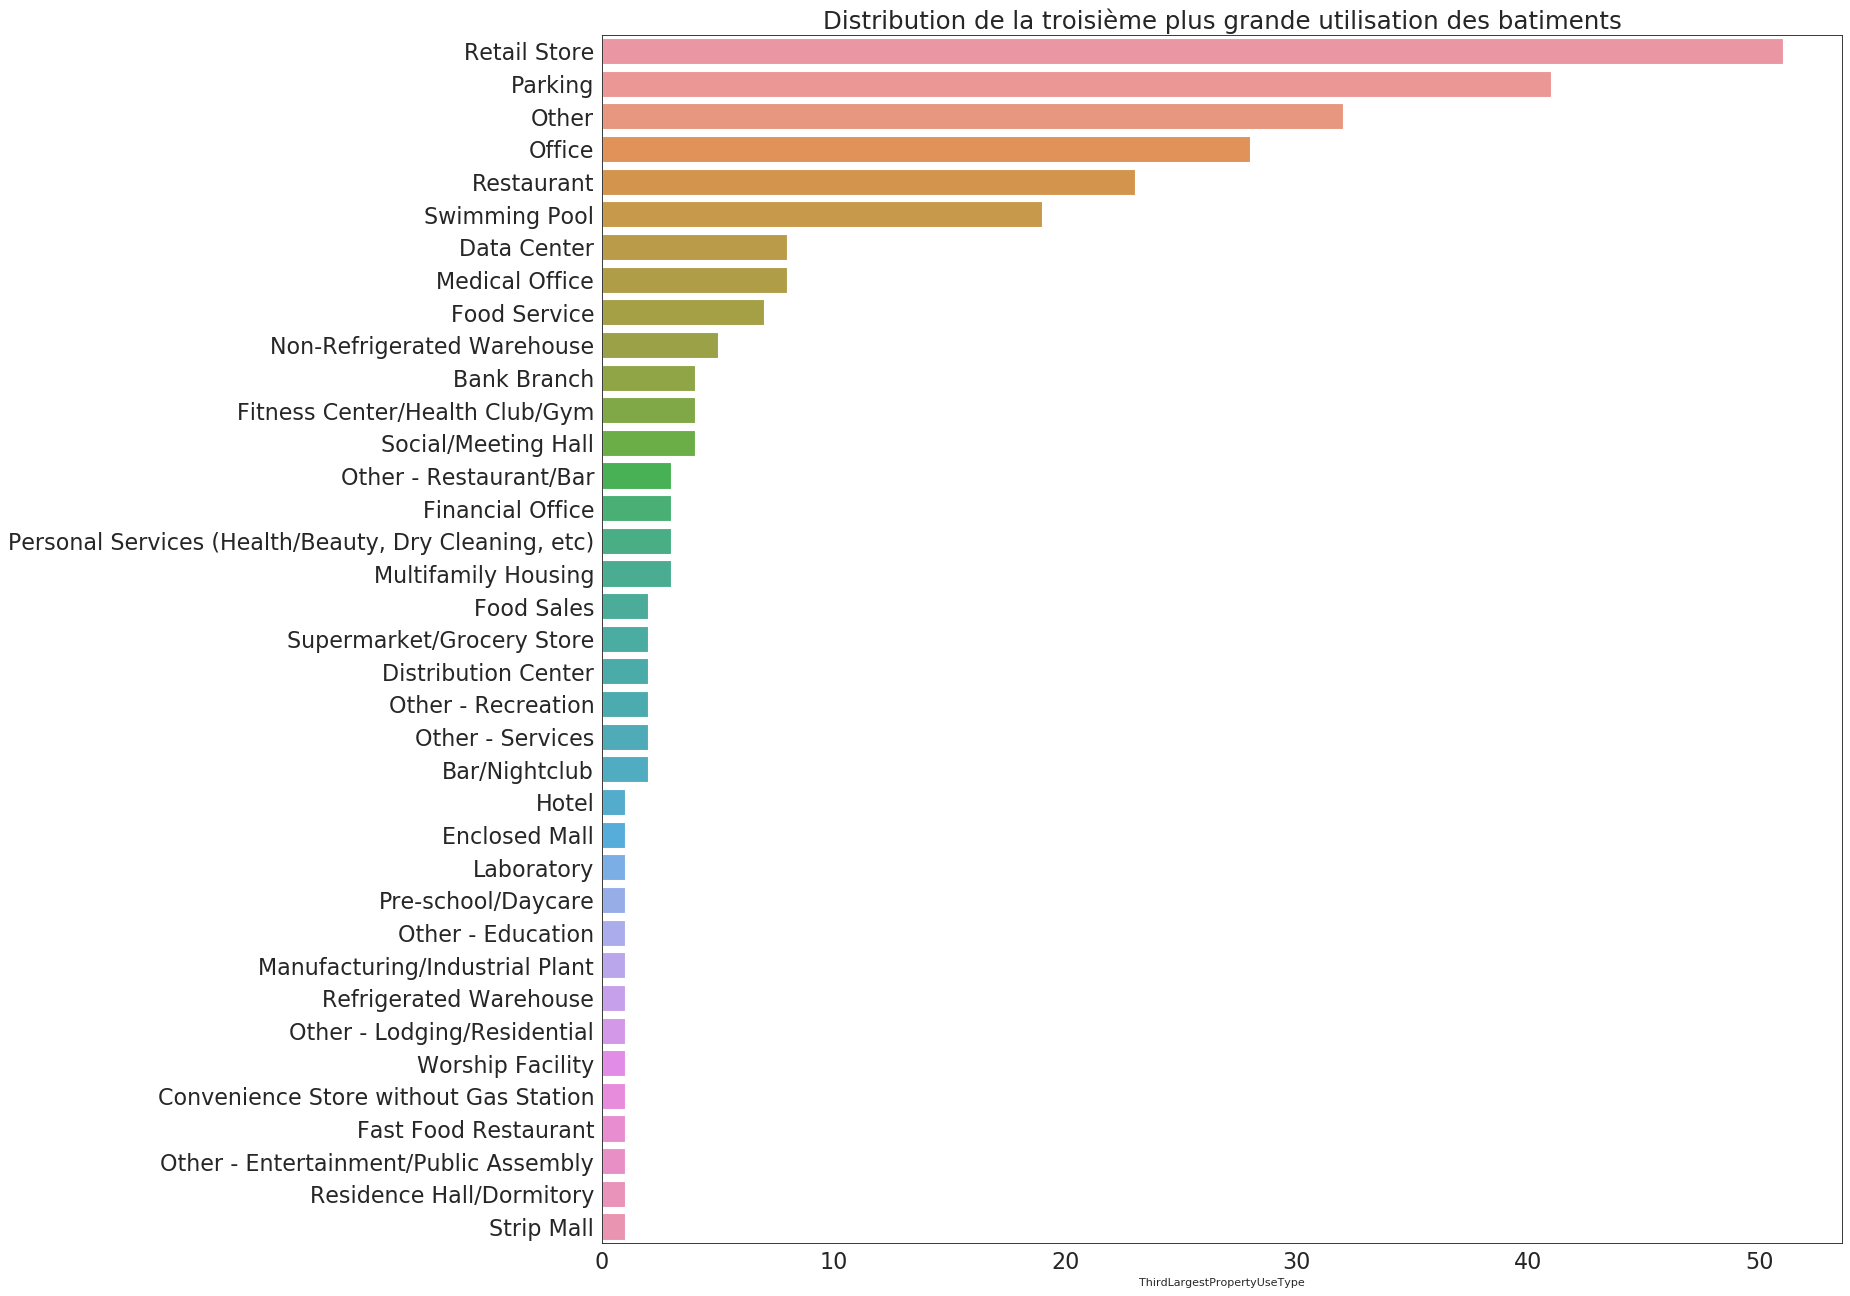

In [77]:
fig,ax = plt.subplots(figsize=(20, 20), dpi= 80, facecolor='w', edgecolor='k')

sampleSize = data2015[data2015['ThirdLargestPropertyUseType'] != 'unUse']

g = sns.barplot(x=sampleSize['ThirdLargestPropertyUseType'].value_counts(), 
                y=sampleSize['ThirdLargestPropertyUseType'].value_counts().index,ax=ax)


plt.title("Distribution de la troisième plus grande utilisation des batiments",fontsize=22)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

#### Analyse bivariée des variables qualitatives

In [78]:
sampleSize3 = data2015[data2015['ThirdLargestPropertyUseType'] != 'unUse']

contigenceTable = pd.crosstab(sampleSize3['PrimaryPropertyType'],sampleSize3['BuildingType']
                              ,margins=True,margins_name="Total")
contigenceTable

BuildingType,Multifamily HR (10+),Multifamily LR (1-4),Multifamily MR (5-9),NonResidential,Nonresidential COS,Total
PrimaryPropertyType,,,,,,
Distribution Center,0,0,0,3,0,3
High-Rise Multifamily,23,0,0,0,0,23
Hotel,0,0,0,8,0,8
Large Office,0,0,0,75,2,77
Low-Rise Multifamily,0,30,0,0,0,30
Medical Office,0,0,0,3,0,3
Mid-Rise Multifamily,0,0,56,0,0,56
Mixed Use Property,0,5,5,22,0,32
Non-Refrigerated Warehouse,0,0,0,6,1,7


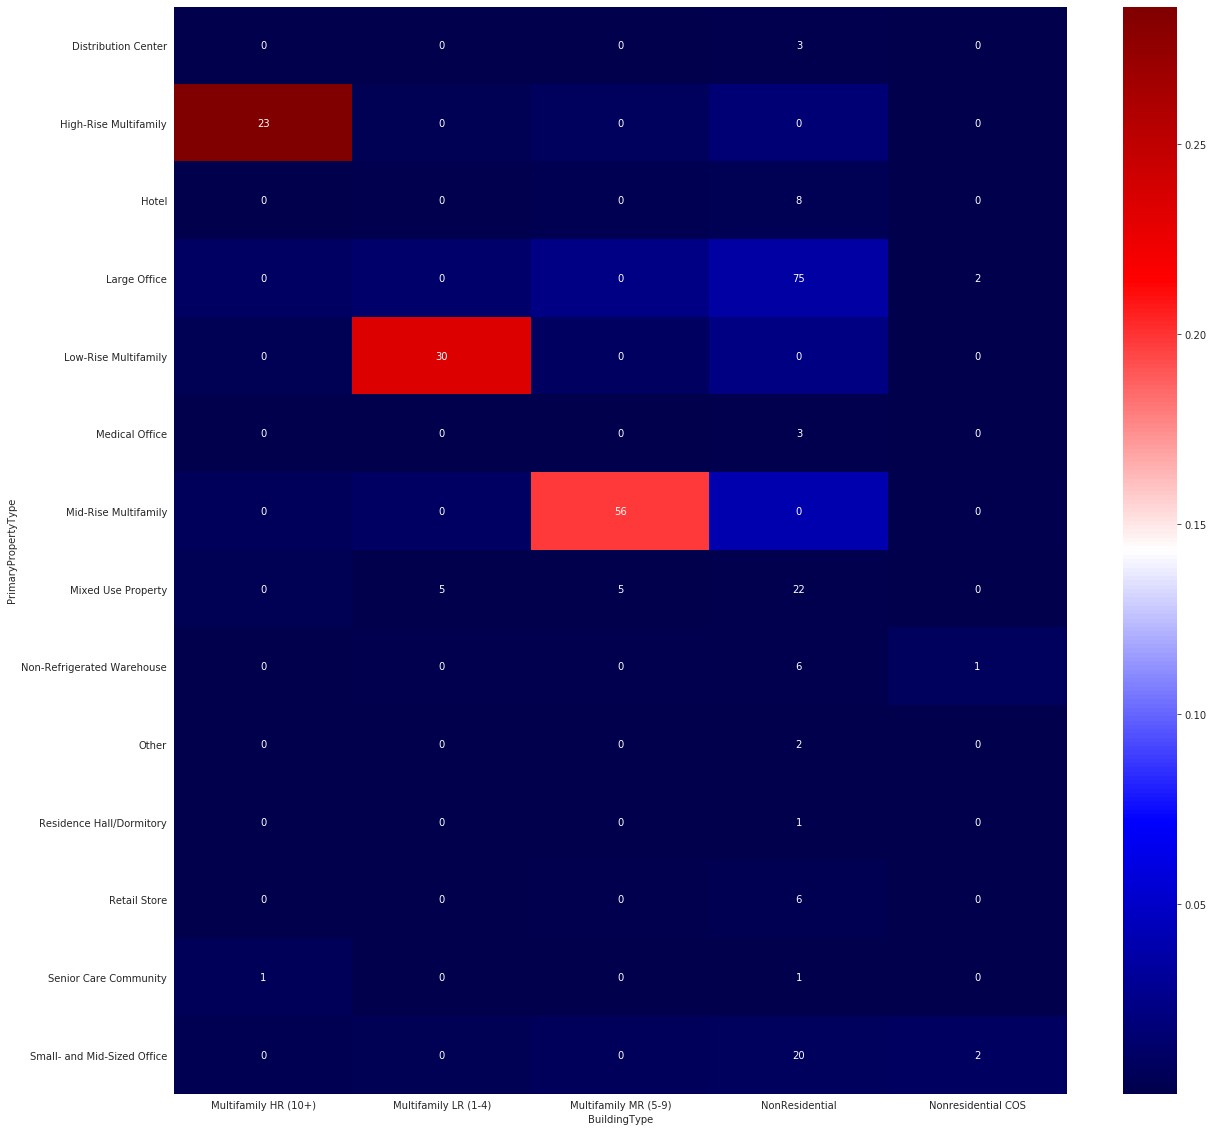

In [79]:

tx = contigenceTable.loc[:,["Total"]]
ty = contigenceTable.loc[["Total"],:]

n = len(sampleSize3[['PrimaryPropertyType','BuildingType']])

indep = tx.dot(ty) / n


c = contigenceTable.fillna(0)

measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1],cmap='seismic')
plt.show()

In [80]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

alpha = 0.05    

contigenceTable = pd.crosstab(sampleSize3['PrimaryPropertyType'], sampleSize3['BuildingType'])
stat_chi2, p, dof, expected_table = chi2_contingency(contigenceTable.values)

critical = chi2.ppf(1-alpha, dof)

if p <= alpha:
    print('Variables non indépendantes')
    
else:
    print('Variables dépendantes')

Variables non indépendantes


In [81]:
contigenceTable = pd.crosstab(sampleSize3['SecondLargestPropertyUseType'],sampleSize3['BuildingType'],
                                 margins=True,margins_name="Total")
contigenceTable

BuildingType,Multifamily HR (10+),Multifamily LR (1-4),Multifamily MR (5-9),NonResidential,Nonresidential COS,Total
SecondLargestPropertyUseType,,,,,,
Adult Education,0,0,0,2,0,2
Bar/Nightclub,0,0,0,1,0,1
College/University,0,0,0,1,0,1
Convenience Store without Gas Station,0,0,0,1,0,1
Data Center,0,0,0,1,0,1
Distribution Center,0,0,0,1,1,2
Financial Office,0,0,0,1,0,1
Hotel,0,0,0,2,0,2
Laboratory,0,0,0,2,0,2


In [82]:
alpha = 0.05    

contigenceTable = pd.crosstab(sampleSize3['SecondLargestPropertyUseType'], sampleSize3['BuildingType'])
stat_chi2, p, dof, expected_table = chi2_contingency(contigenceTable.values)

critical = chi2.ppf(1-alpha, dof)

if p <= alpha:
    print('Variables non indépendantes')
    
else:
    print('Variables dépendantes')

Variables dépendantes


In [83]:
contigenceTable = pd.crosstab(sampleSize3['ThirdLargestPropertyUseType'],sampleSize3['BuildingType'],
                                 margins=True,margins_name="Total")
contigenceTable

BuildingType,Multifamily HR (10+),Multifamily LR (1-4),Multifamily MR (5-9),NonResidential,Nonresidential COS,Total
ThirdLargestPropertyUseType,,,,,,
Bank Branch,0,0,0,4,0,4
Bar/Nightclub,0,0,1,1,0,2
Convenience Store without Gas Station,0,0,0,1,0,1
Data Center,0,0,0,7,1,8
Distribution Center,0,0,0,2,0,2
Enclosed Mall,0,0,0,1,0,1
Fast Food Restaurant,0,1,0,0,0,1
Financial Office,0,0,0,3,0,3
Fitness Center/Health Club/Gym,0,0,1,3,0,4


In [84]:
alpha = 0.05    

contigenceTable = pd.crosstab(sampleSize3['ThirdLargestPropertyUseType'], sampleSize3['BuildingType'])
stat_chi2, p, dof, expected_table = chi2_contingency(contigenceTable.values)

critical = chi2.ppf(1-alpha, dof)

if p <= alpha:
    print('Variables non indépendantes')
    
else:
    print('Variables dépendantes')

Variables dépendantes


In [85]:
contigenceTable = pd.crosstab(sampleSize3['ThirdLargestPropertyUseType'],sampleSize3['SecondLargestPropertyUseType'],
                                 margins=True,margins_name="Total")
contigenceTable

SecondLargestPropertyUseType,Adult Education,Bar/Nightclub,College/University,Convenience Store without Gas Station,Data Center,Distribution Center,Financial Office,Hotel,Laboratory,Manufacturing/Industrial Plant,...,Other - Recreation,Other - Restaurant/Bar,Parking,Performing Arts,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Supermarket/Grocery Store,Total
ThirdLargestPropertyUseType,,,,,,,,,,,,,,,,,,,,,
Bank Branch,1,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,4
Bar/Nightclub,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
Convenience Store without Gas Station,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
Data Center,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,3,0,0,0,8
Distribution Center,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
Enclosed Mall,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
Fast Food Restaurant,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
Financial Office,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,3
Fitness Center/Health Club/Gym,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,4


### 2.2 Analyse des variables quantitatives

#### Analyse univariée des variables quantitatives

In [86]:
data2015.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
Neighborhood                        object
YearBuilt                            int64
NumberofBuildings                    int64
NumberofFloors                     float64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                    float64
SiteEnergyUse(kBtu)                float64
TotalGHGEmissions                  float64
Latitude                           float64
Longitude                          float64
dtype: object

In [87]:
newData = data2015.select_dtypes(include=['int64','float64']).drop(['OSEBuildingID','DataYear'],axis=1)
newData.head()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude
0,1927,1,12.0,88434,0,88434,88434.0,0.0,0.0,65.0,6981428.0,249.43,47.612190,-122.337997
1,1996,1,11.0,103566,15064,88502,83880.0,15064.0,4622.0,51.0,8354235.0,263.51,47.613106,-122.333358
3,1926,1,10.0,61320,0,61320,61320.0,0.0,0.0,1.0,28229320.0,1936.34,47.614216,-122.336609
4,1980,1,18.0,119890,12460,107430,123445.0,68009.0,0.0,67.0,14829099.0,507.70,47.613754,-122.340924
6,1926,1,11.0,83008,0,83008,81352.0,0.0,0.0,25.0,6252842.0,208.46,47.614114,-122.332741


YearBuilt


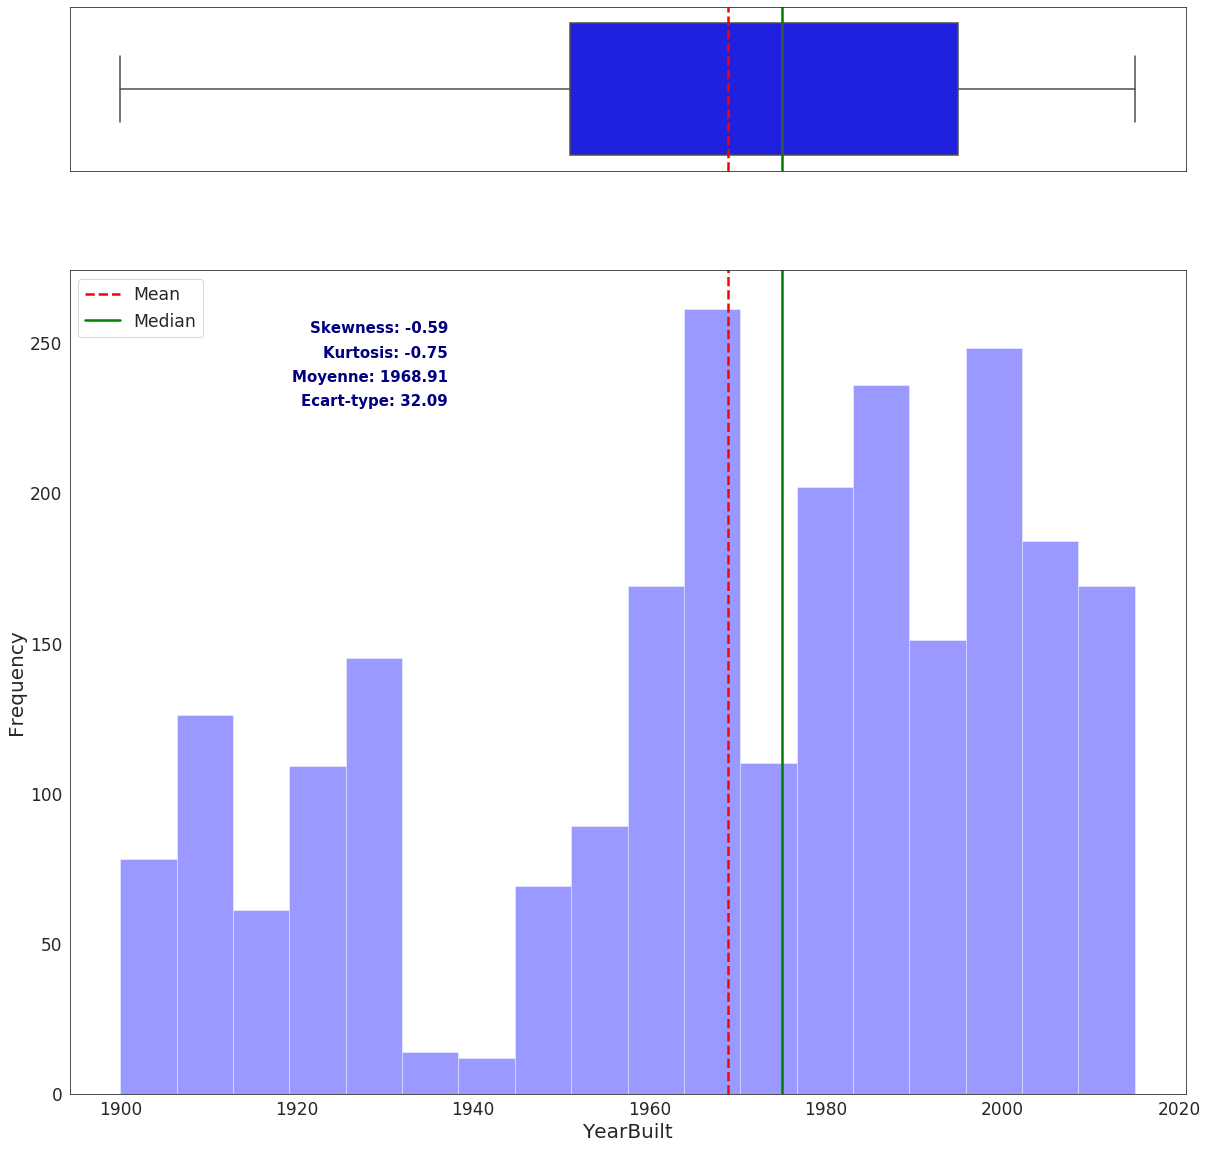

NumberofBuildings


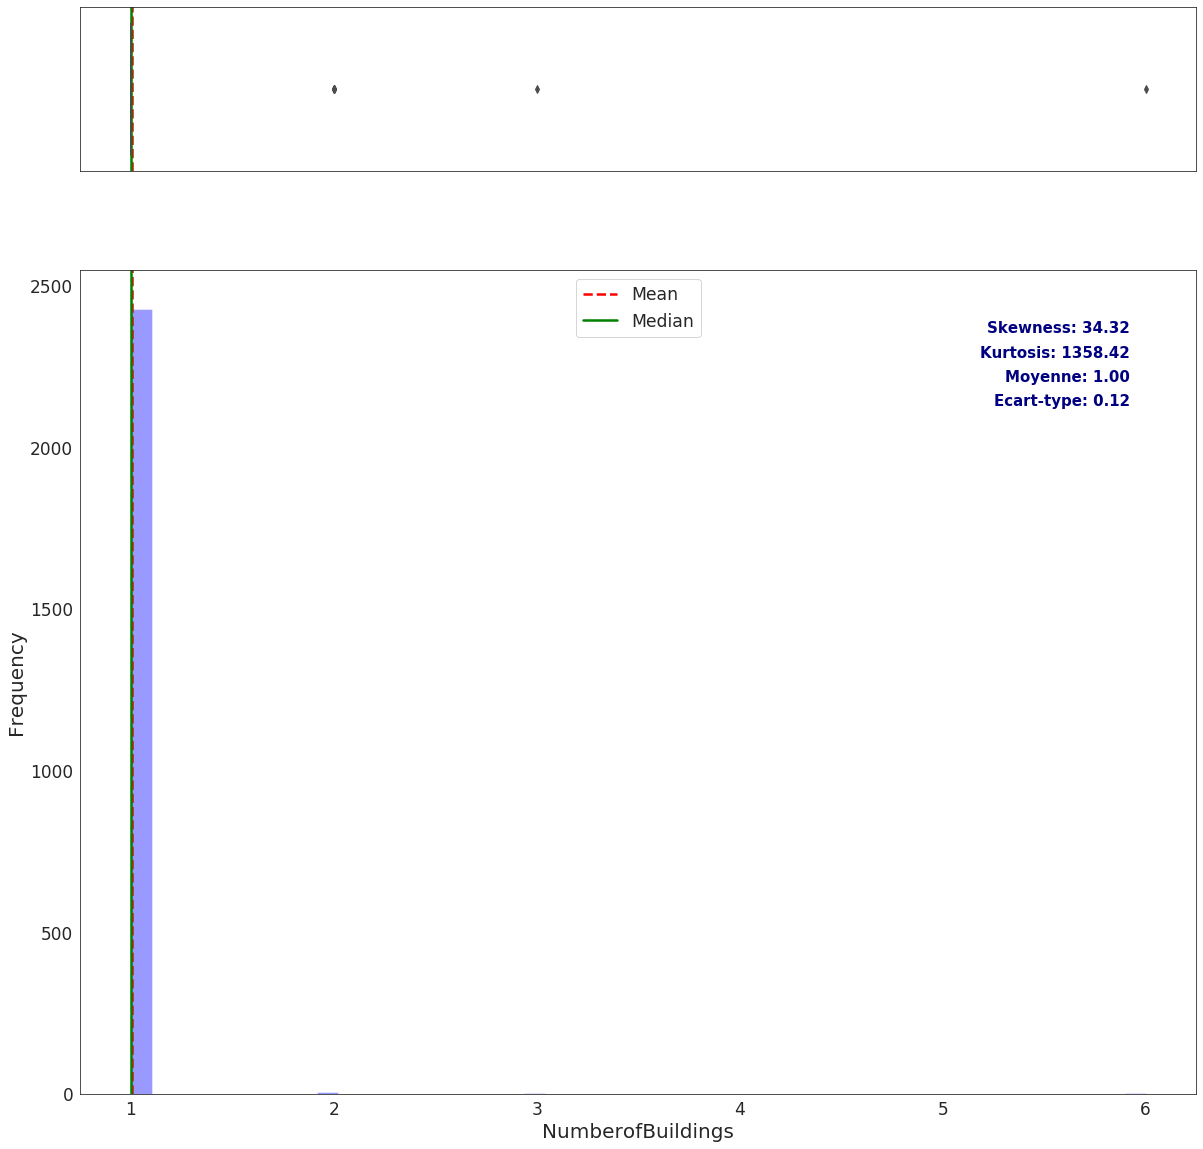

NumberofFloors


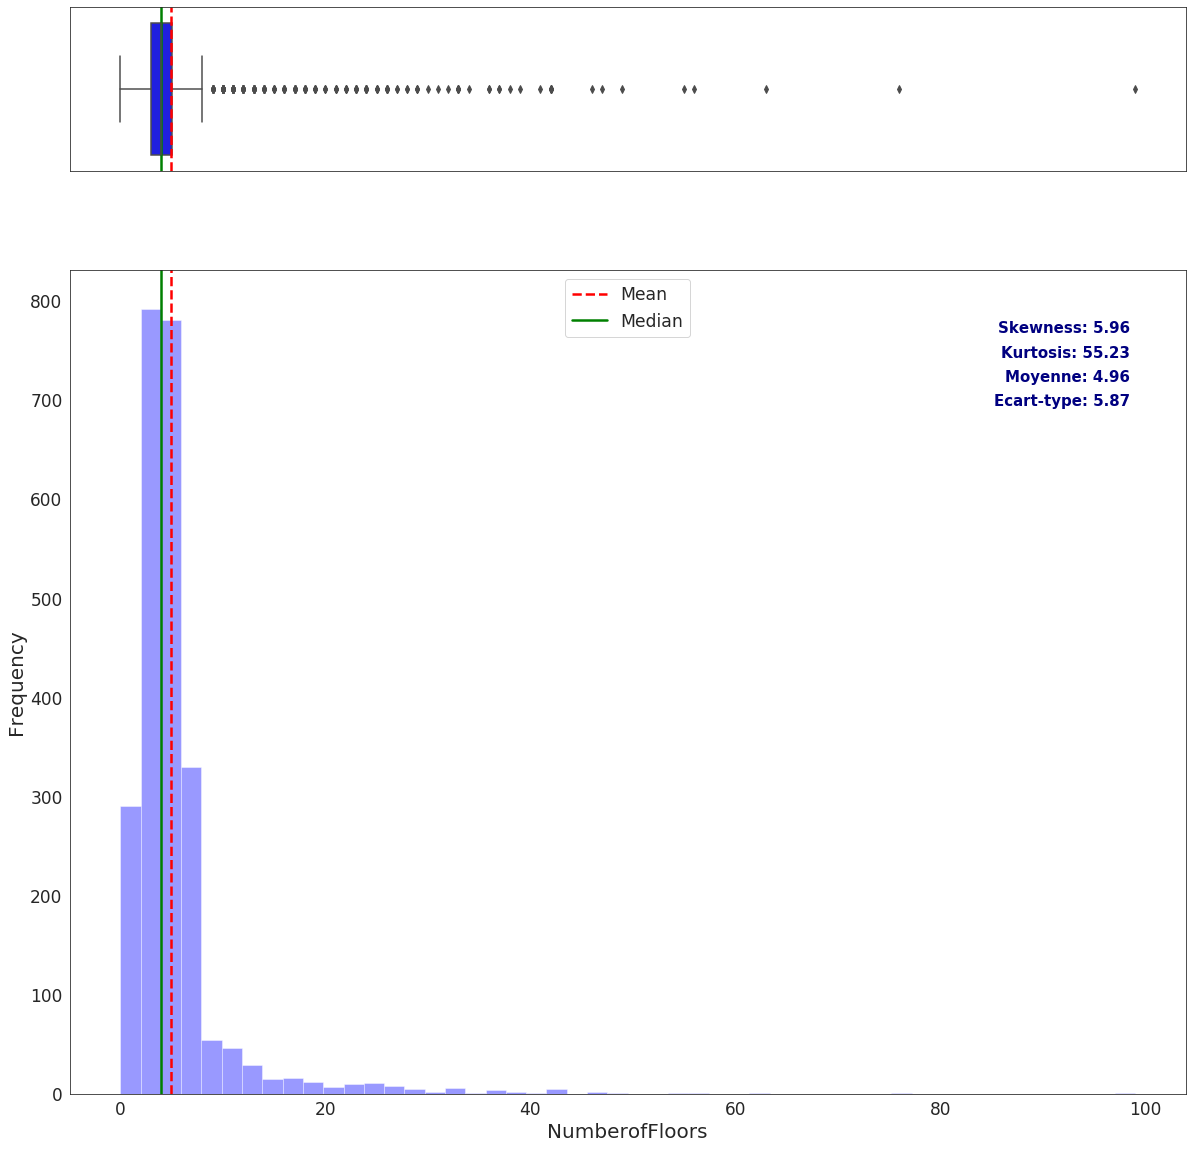

PropertyGFATotal


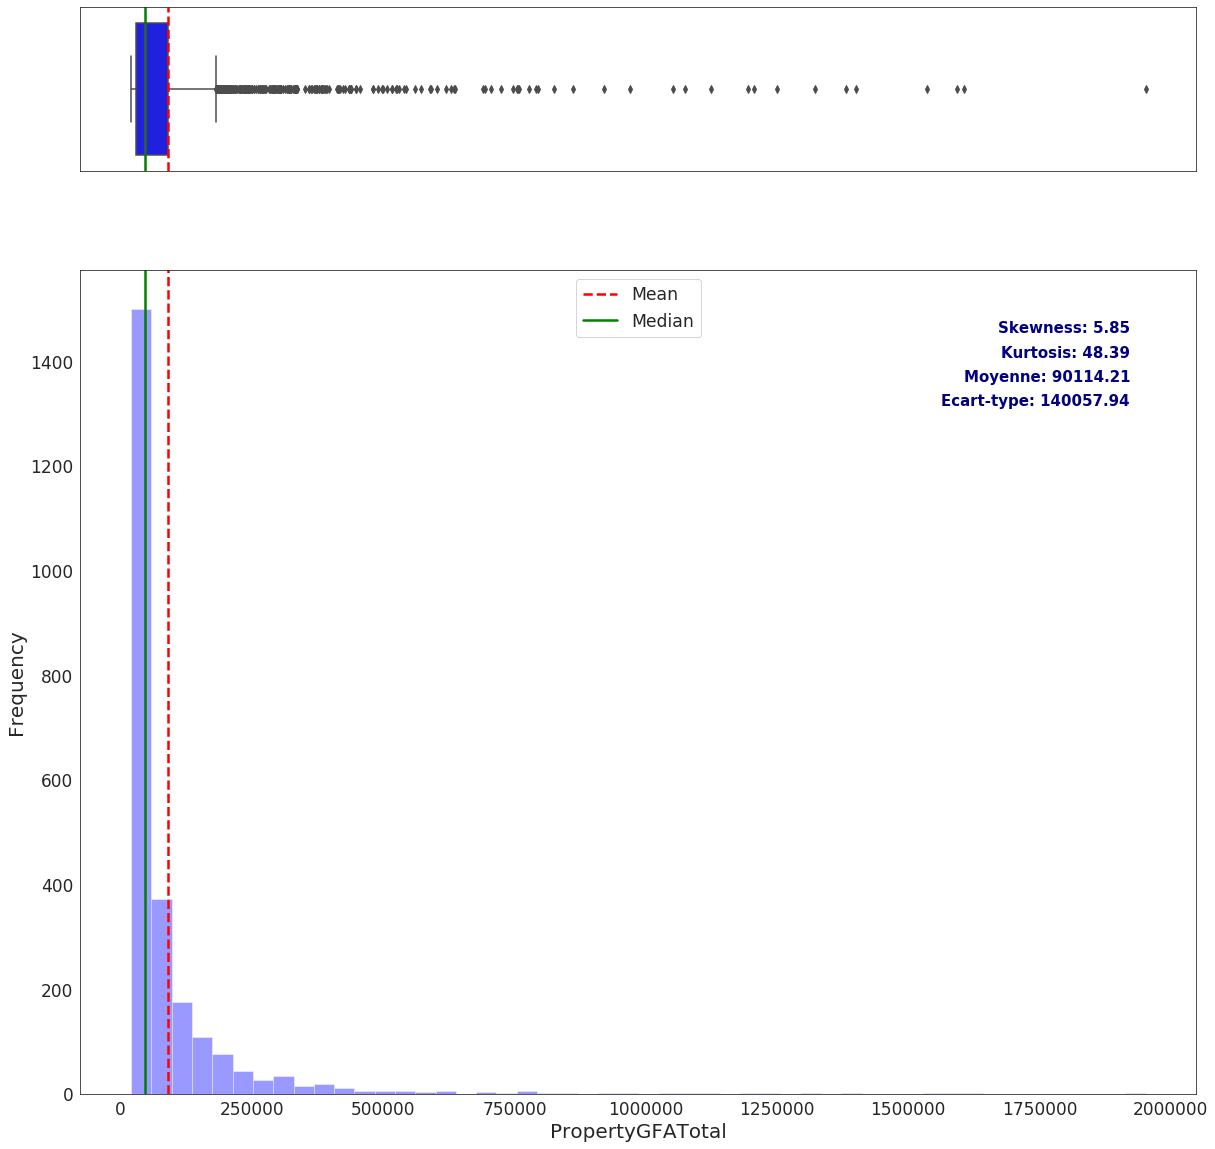

PropertyGFAParking


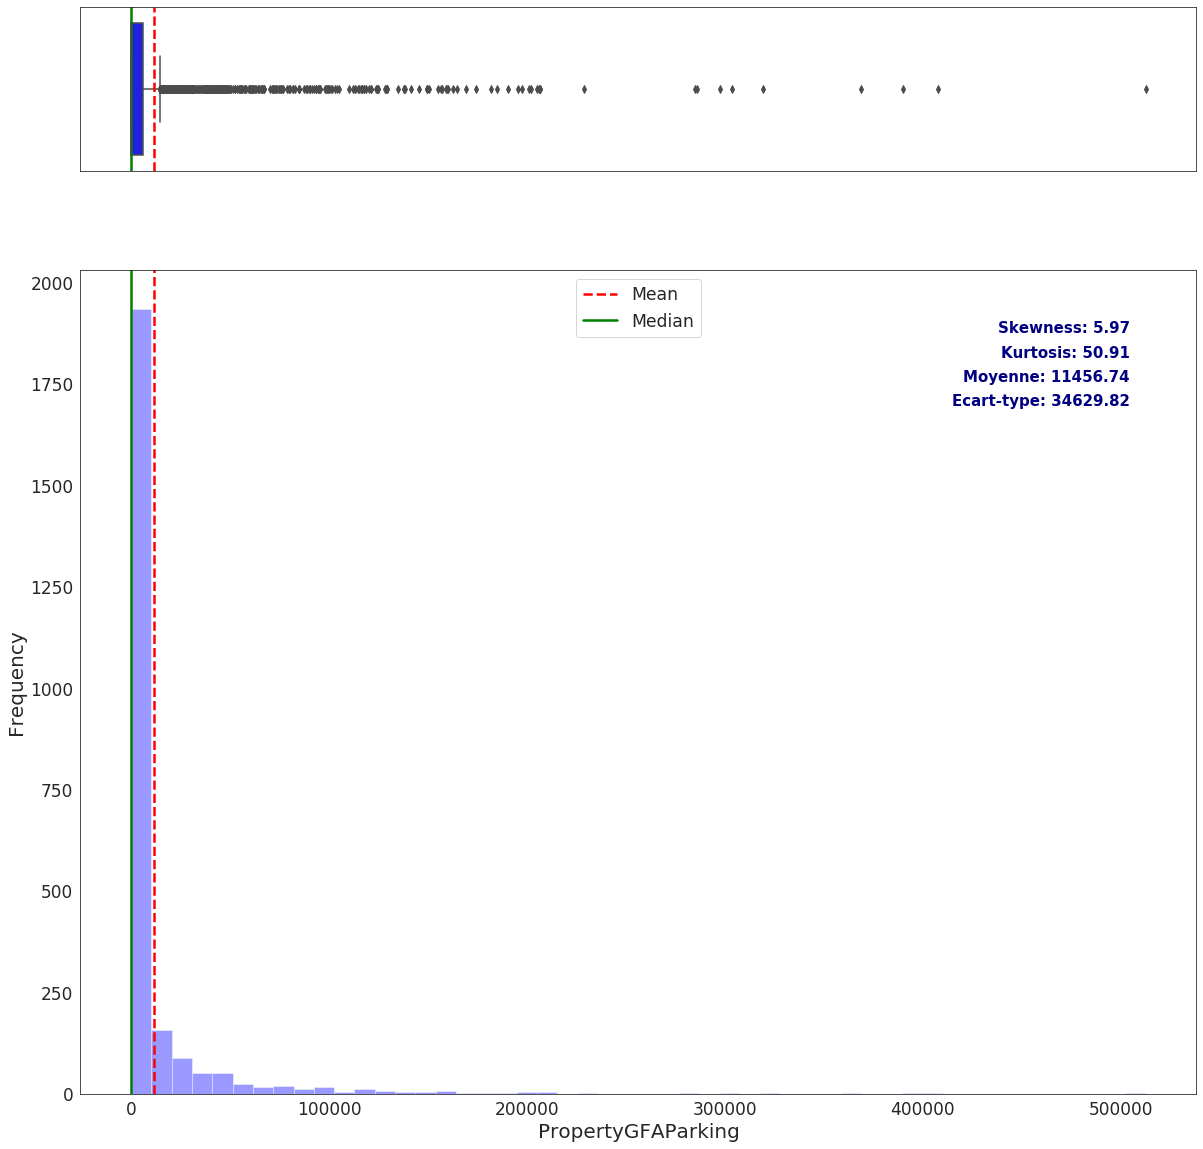

PropertyGFABuilding(s)


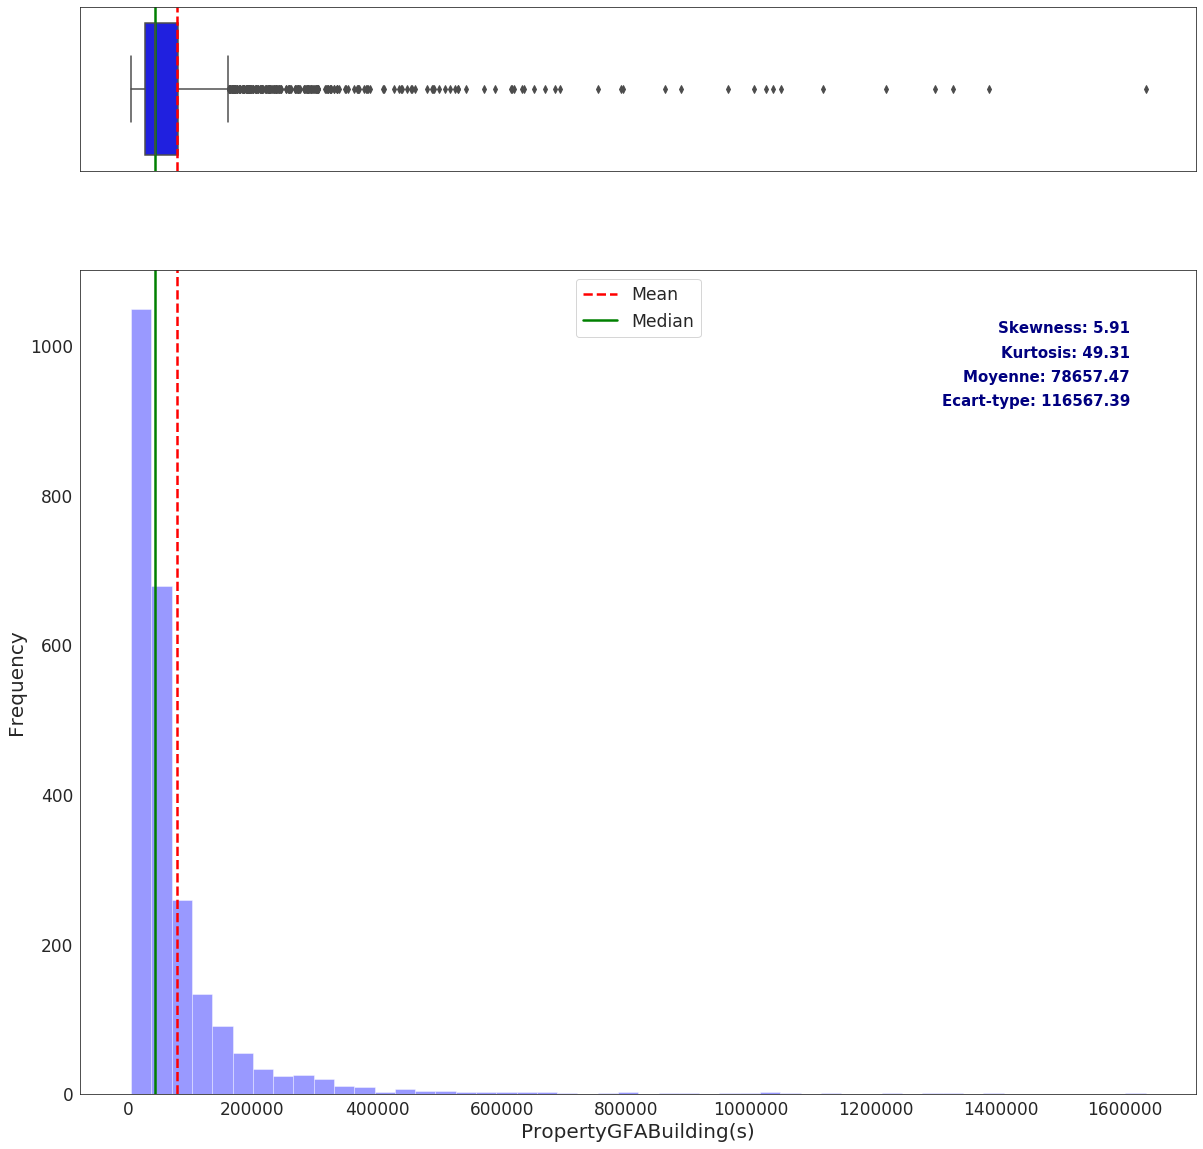

LargestPropertyUseTypeGFA


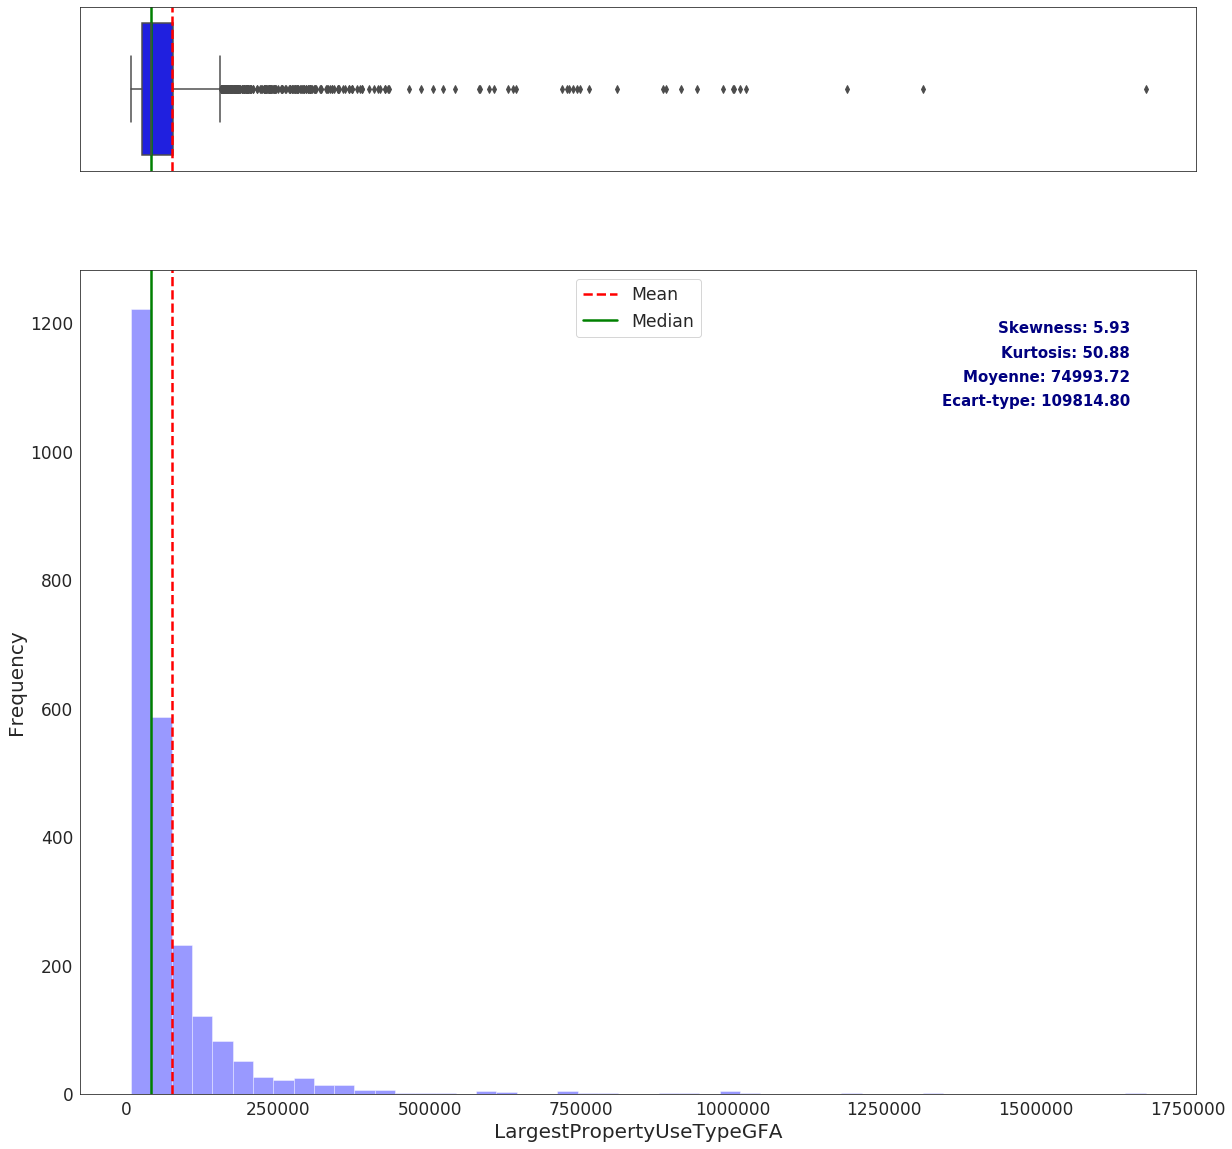

SecondLargestPropertyUseTypeGFA


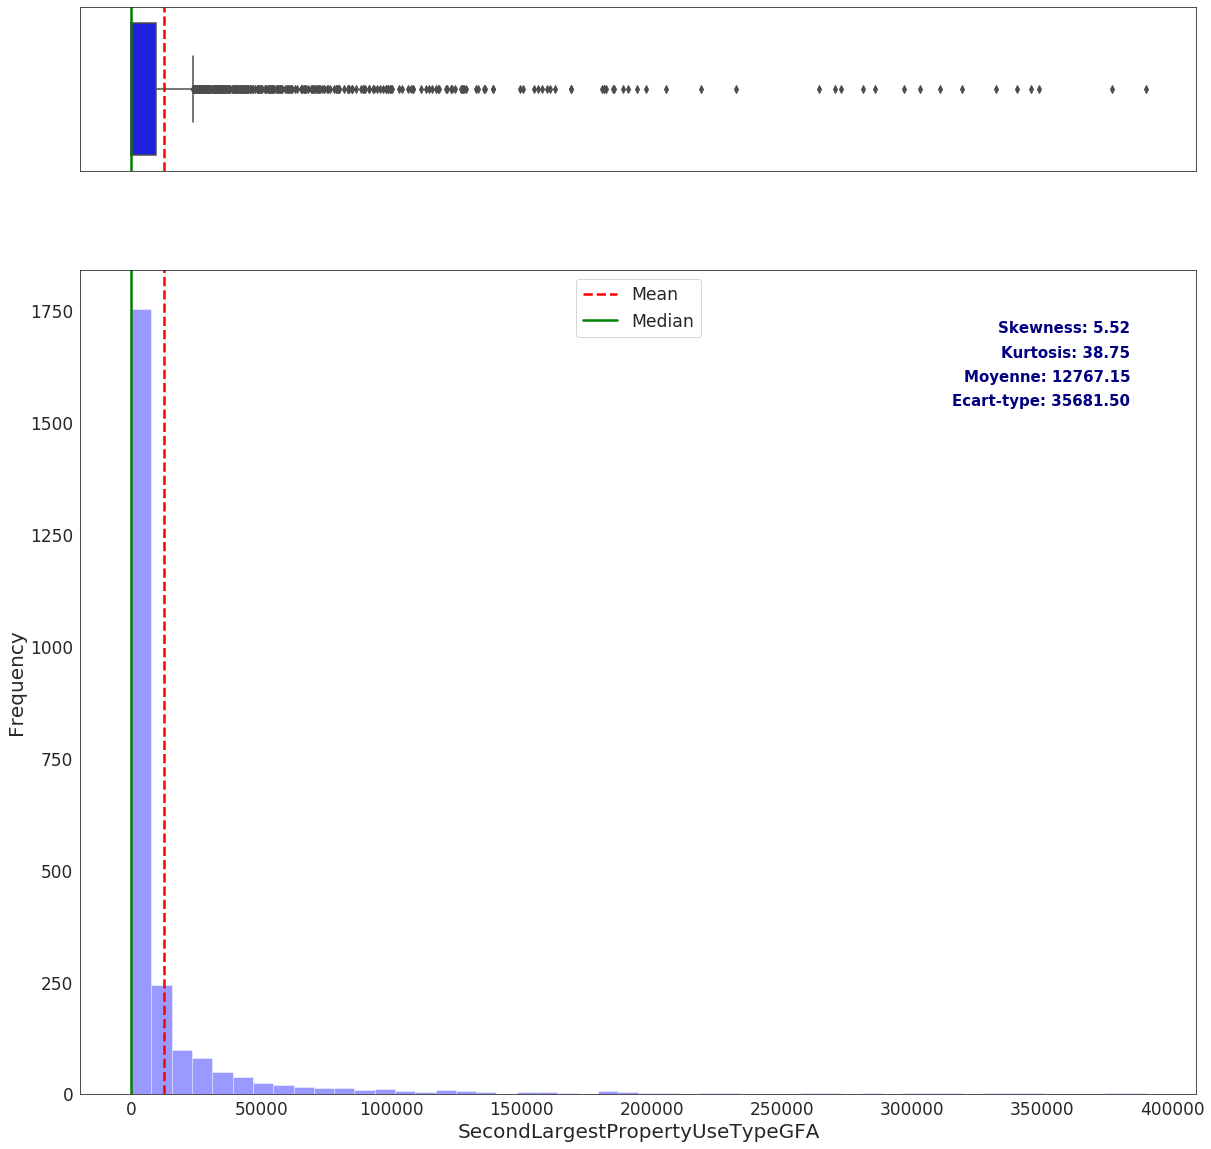

ThirdLargestPropertyUseTypeGFA


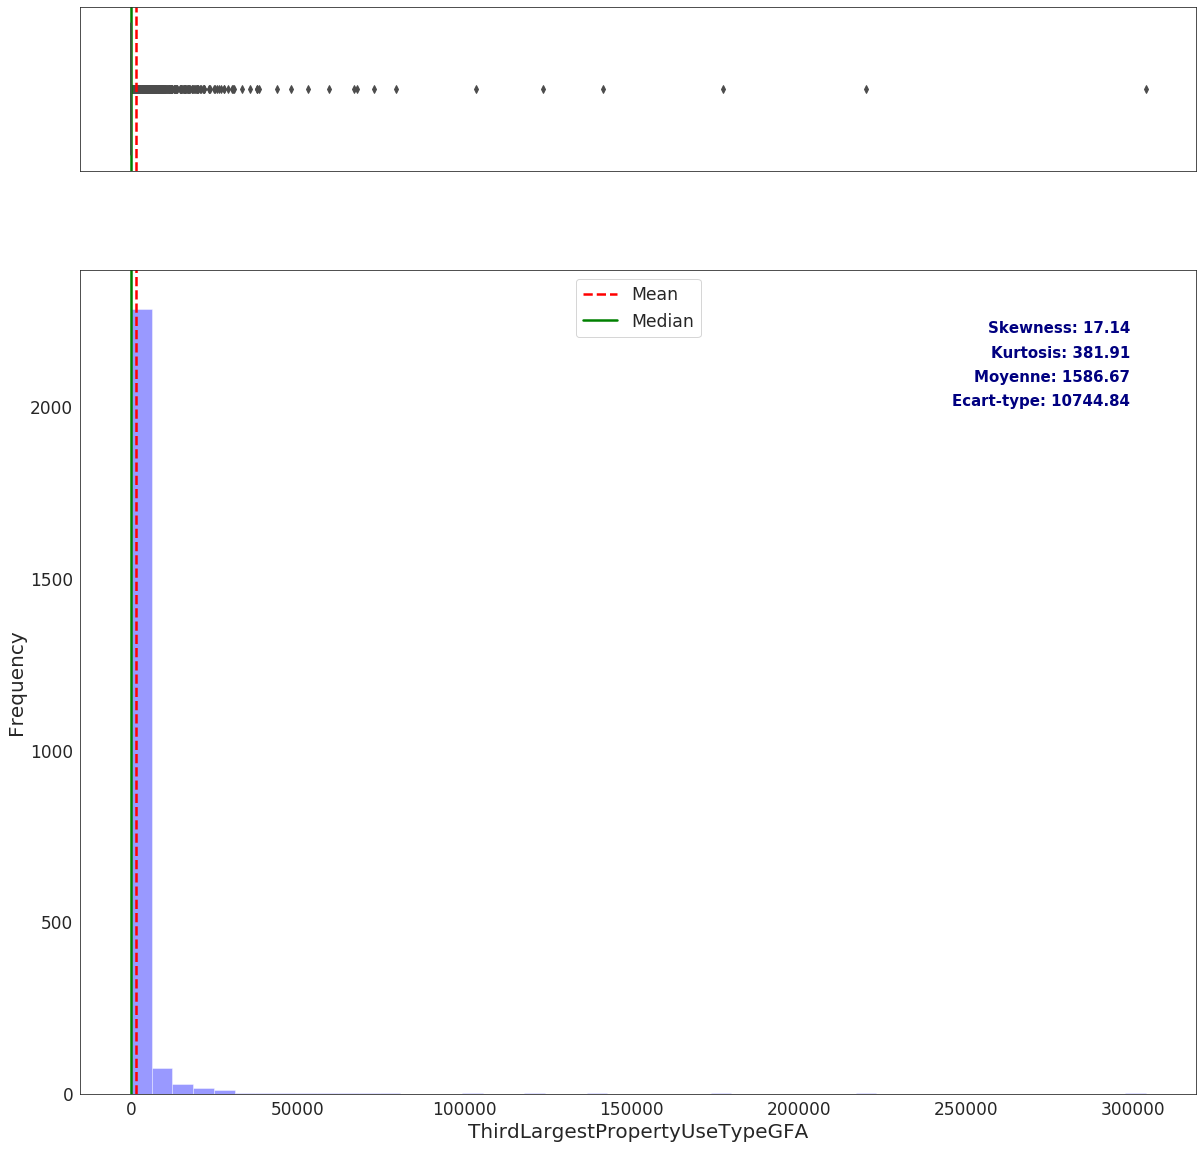

ENERGYSTARScore


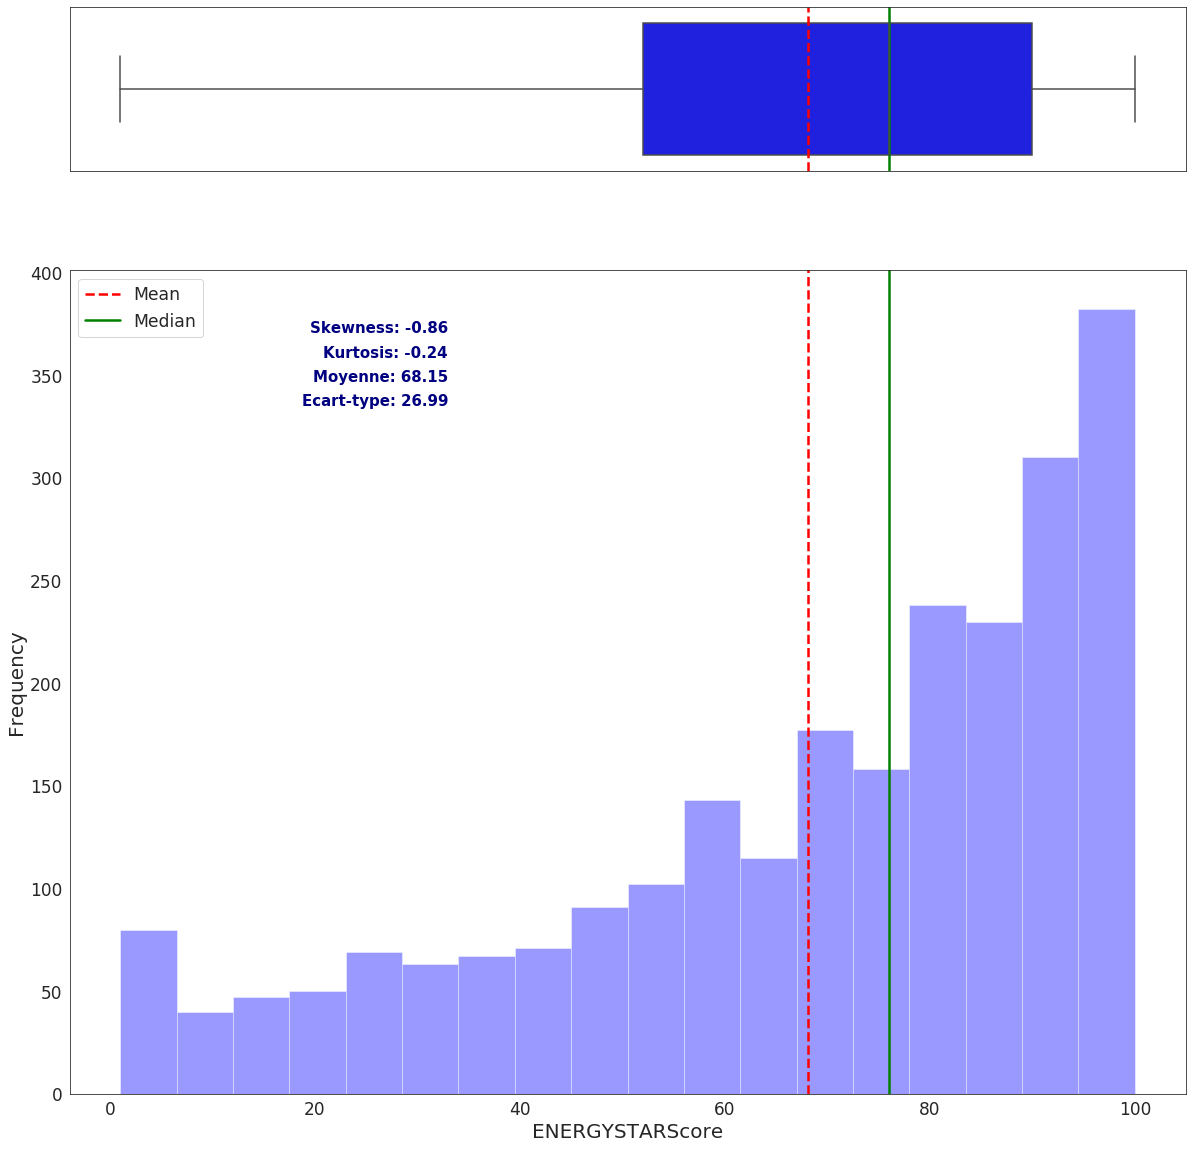

SiteEnergyUse(kBtu)


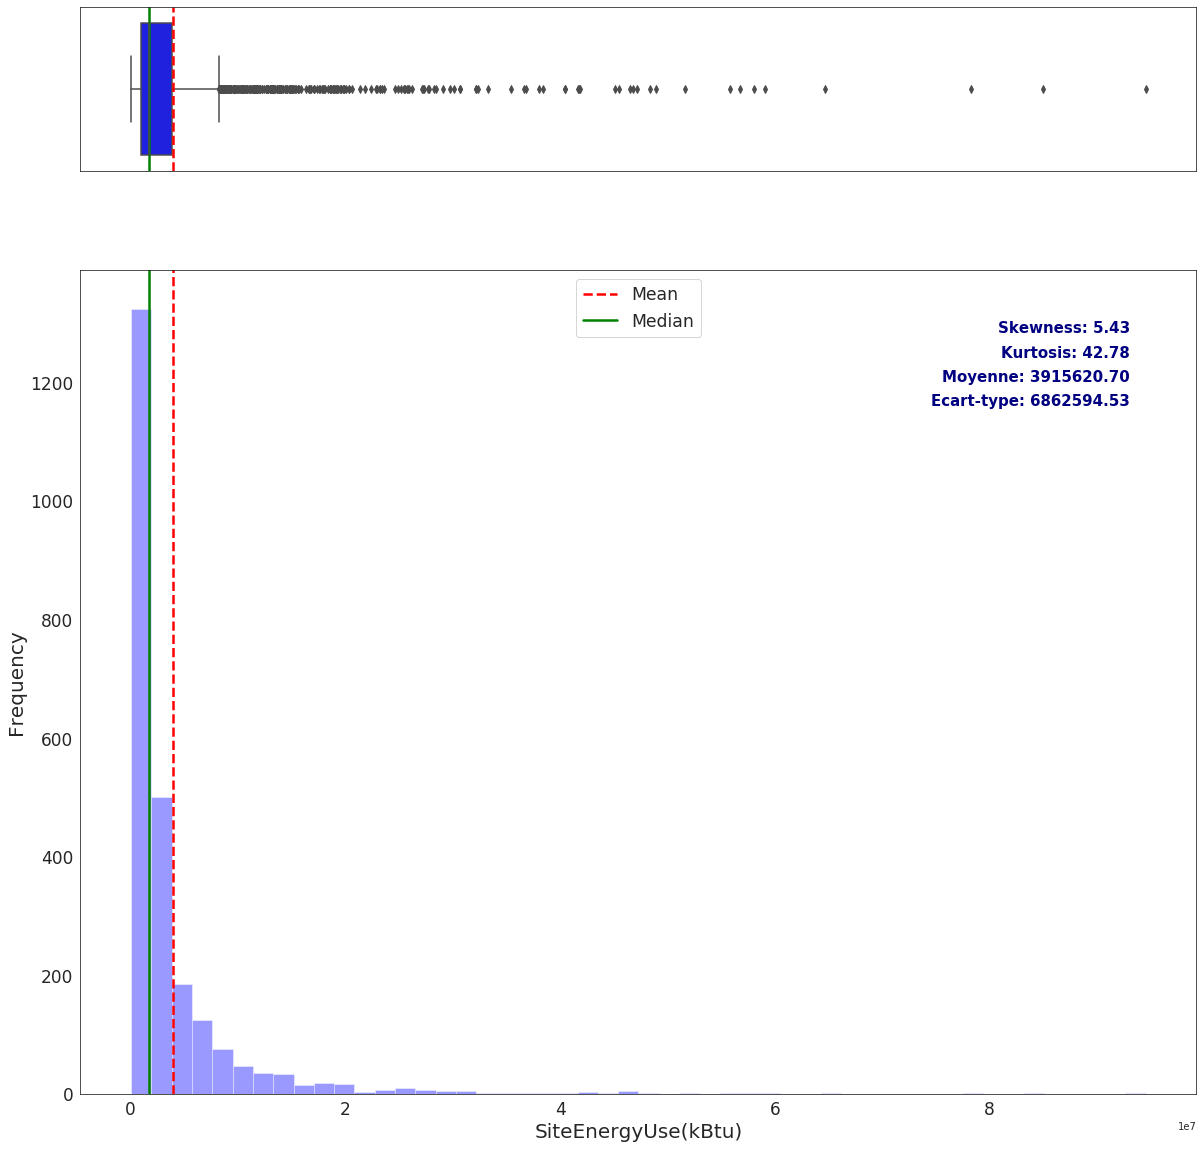

TotalGHGEmissions


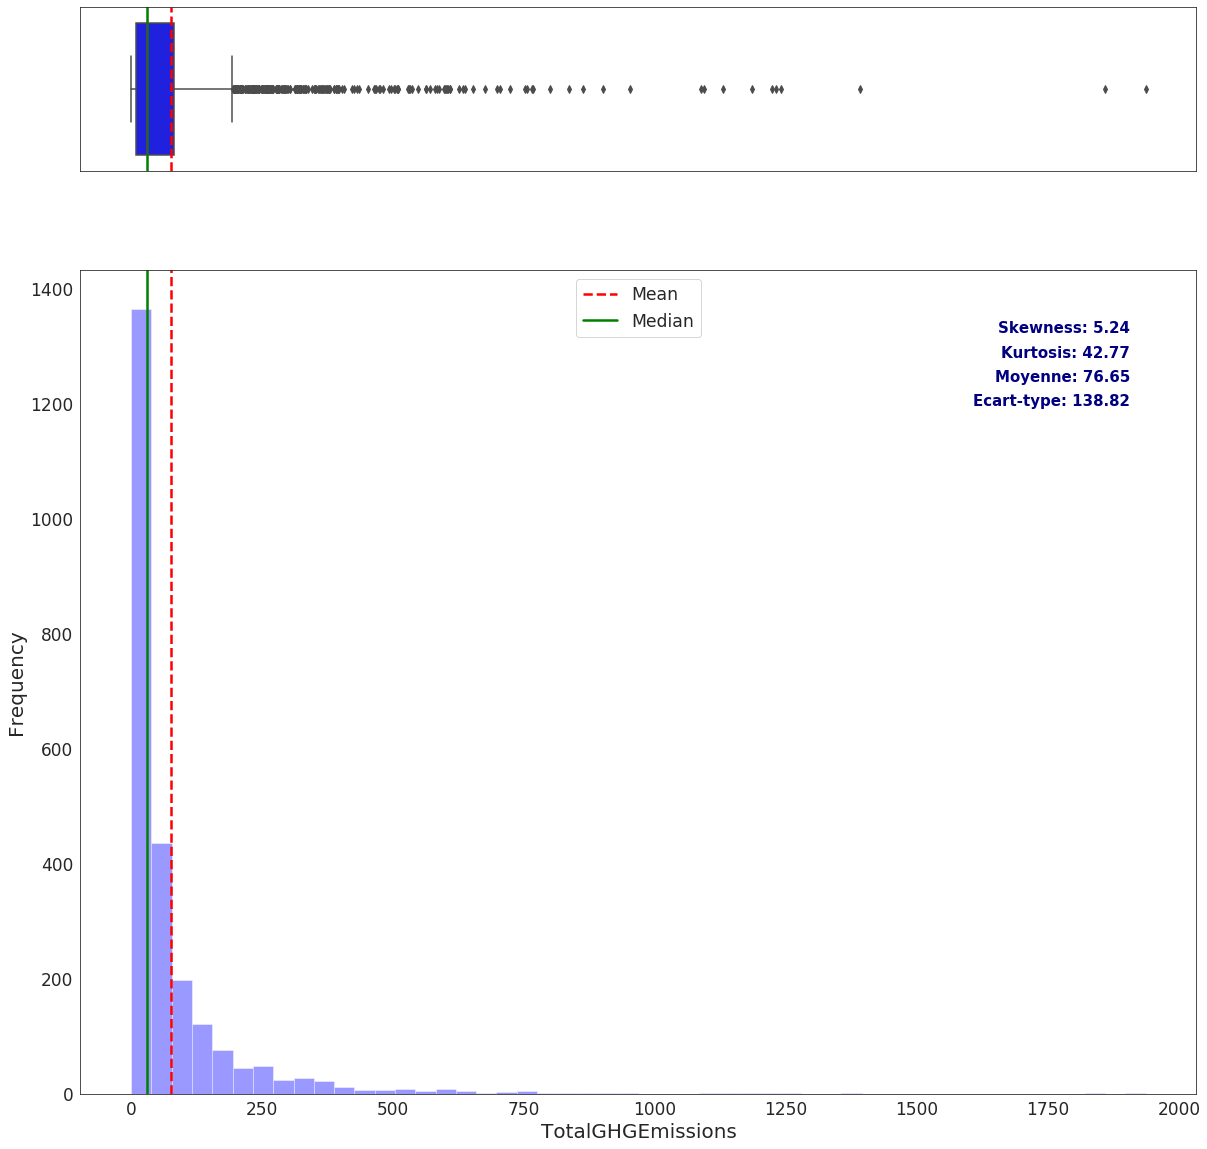

Latitude


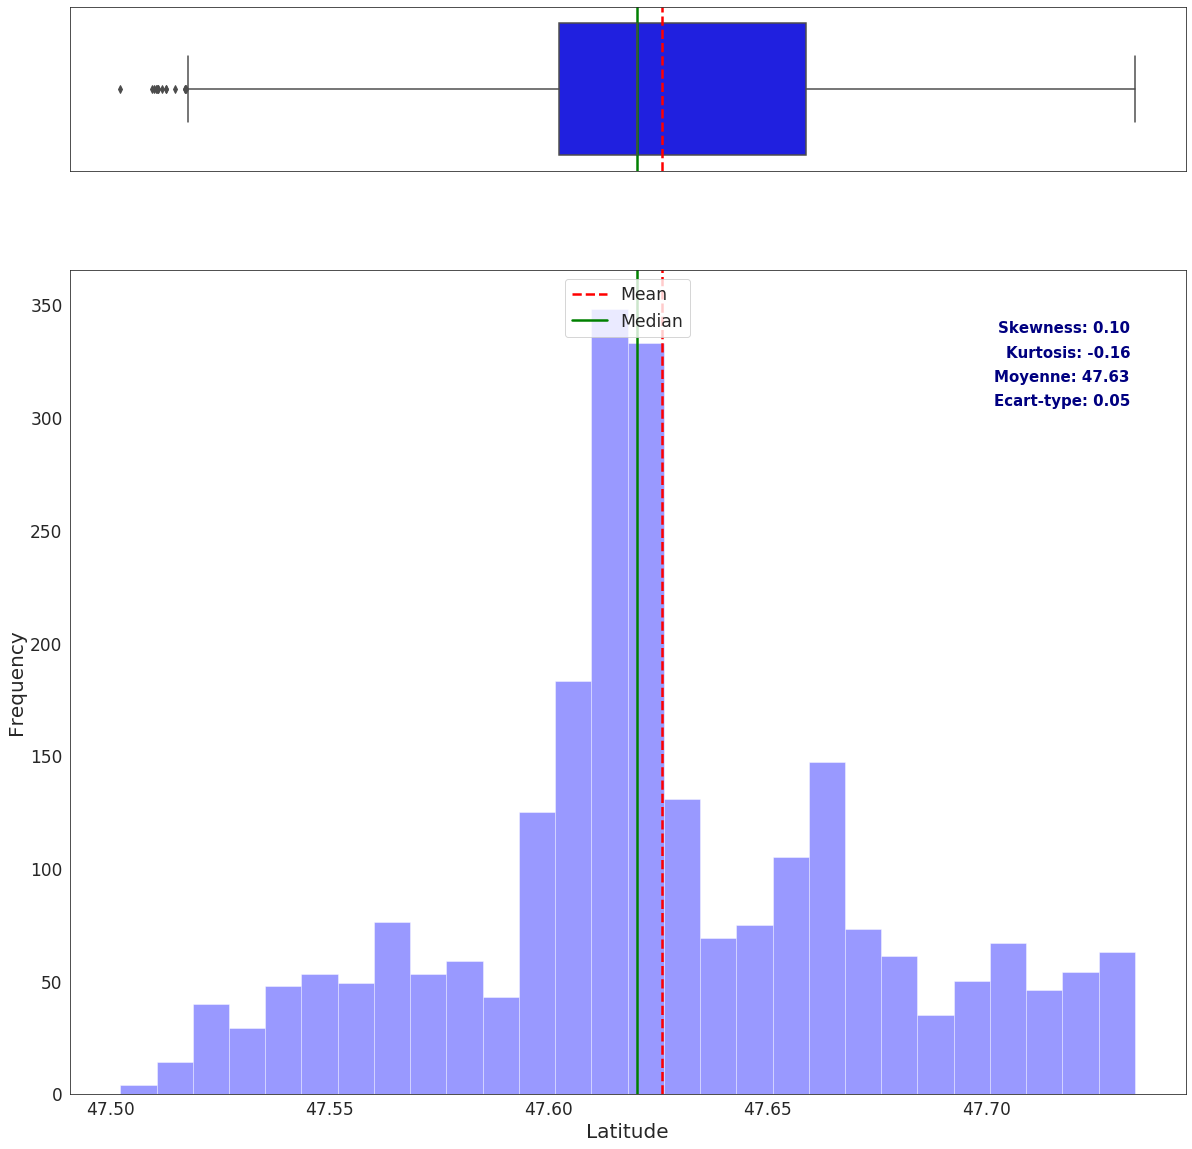

Longitude


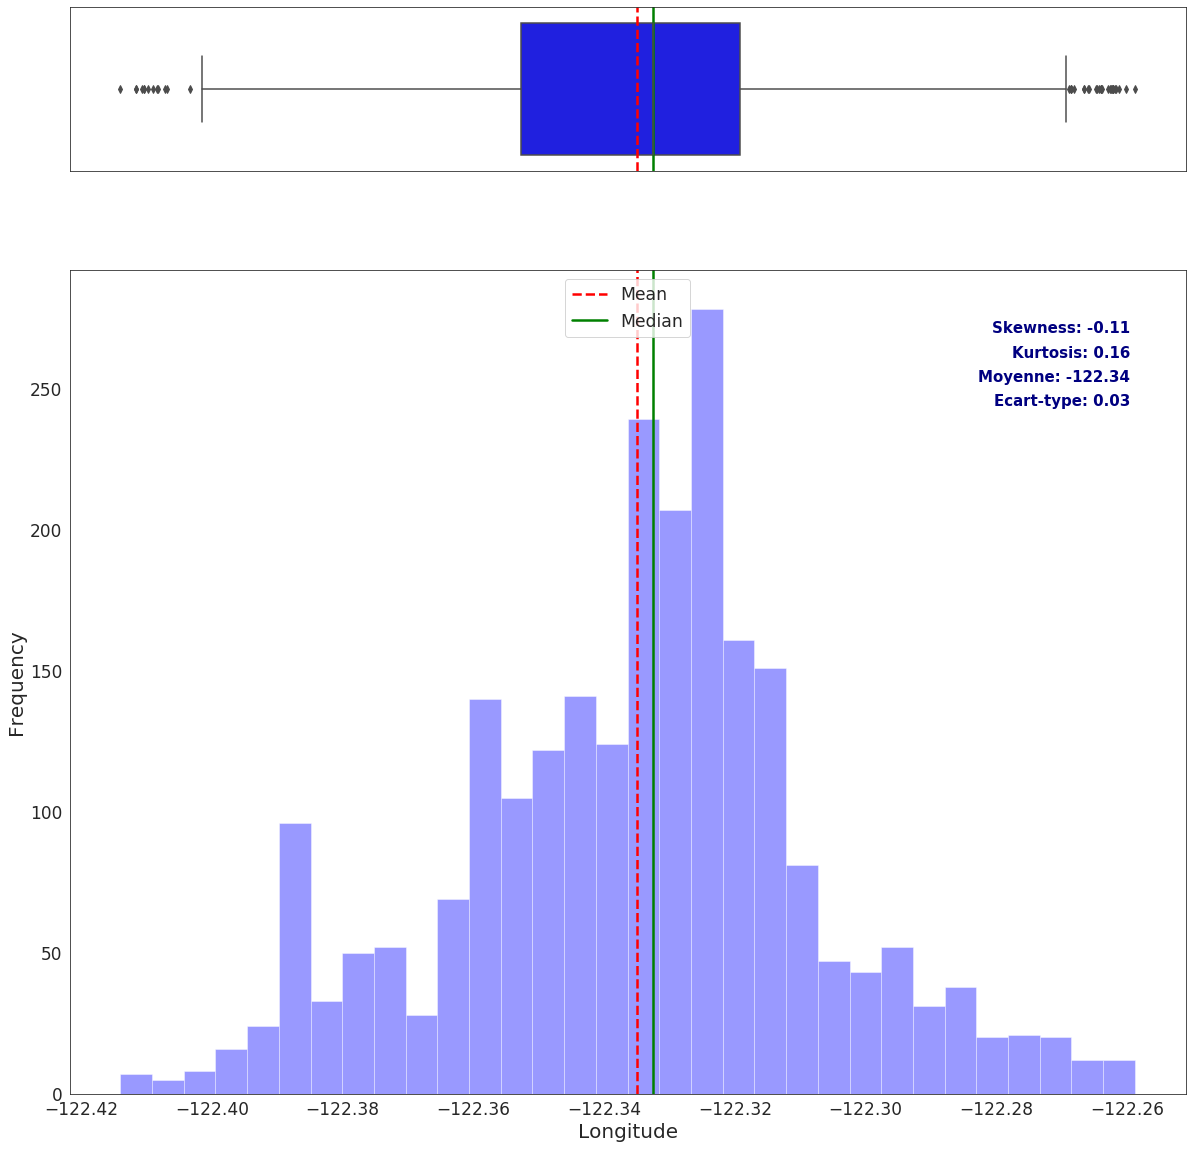

In [88]:
for cols in newData.columns:
    print(cols)
    dataMean = newData[cols].dropna().mean()
    dataMedian = newData[cols].dropna().median()
    
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
    
    sns.boxplot(newData[cols].dropna(),color="blue",ax=ax_box)
    ax_box.axvline(float(dataMean),color='r', linestyle='--',linewidth=2.5)
    ax_box.axvline(float(dataMedian), color='g', linestyle='-',linewidth=2.5)
    ax_box.set_xlabel("")
    ax_box.set_ylabel("")

    if (cols == 'ENERGYSTARScore' or cols == 'YearBuilt'):
        xx = 0.2
        location = 'upper left'
    else:
        xx = 0.75
        location = 'upper center'
        
    sns.distplot(newData[cols].dropna(),kde=False,color="blue",ax=ax_hist)
    ax_hist.text(x=xx, y=0.52, transform=ax.transAxes, s="Skewness: %.2f" % newData[cols].dropna().skew(),\
            fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='navy')
    ax_hist.text(x=xx, y=0.50, transform=ax.transAxes, s="Kurtosis: %.2f" % newData[cols].dropna().kurt(),\
            fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='navy')
    ax_hist.text(x=xx, y=0.48, transform=ax.transAxes, s="Moyenne: %.2f" % newData[cols].dropna().mean(),\
           fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
           backgroundcolor='white', color='navy')
    ax_hist.text(x=xx, y=0.46, transform=ax.transAxes, s="Ecart-type: %.2f" % newData[cols].dropna().std(),\
           fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
           backgroundcolor='white', color='navy')
    
    yMinMax = ax_hist.get_ylim()
    
    ax_hist.axvline(float(dataMean),yMinMax[0],yMinMax[1],color='r', linestyle='--',linewidth=2.5)
    ax_hist.axvline(float(dataMedian),yMinMax[0],yMinMax[1], color='g', linestyle='-',linewidth=2.5)
        
    plt.legend({'Mean':float(dataMean),'Median':float(dataMedian)},loc=location,fontsize='xx-large')
    plt.xlabel(cols,fontsize=20)
    plt.ylabel('Frequency',fontsize=20)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    
    #figName = 'distribution_nutriscore.png'
    #plt.savefig(figName,bbox_inches="tight")
    plt.show()

### Indépendances des différentes variables

#### Analyse bivariée des variables quantitatives

In [89]:
import scipy.stats as stats

def corMatWithPValues(dataframe):
    cols = dataframe.shape[1]
    r = pd.DataFrame(np.ones(shape=(cols, cols)),index=dataframe.columns,columns=dataframe.columns)
    p = pd.DataFrame(np.ones(shape=(cols, cols)),index=dataframe.columns,columns=dataframe.columns)
    
    for i in range(cols):
        for j in range(i+1, cols):
            cor, pval = stats.pearsonr(dataframe.iloc[:,i], dataframe.iloc[:,j])
            r.iloc[i, j] = r.iloc[j, i] = cor
            p.iloc[i, j] = p.iloc[j, i] = pval

    return r, p

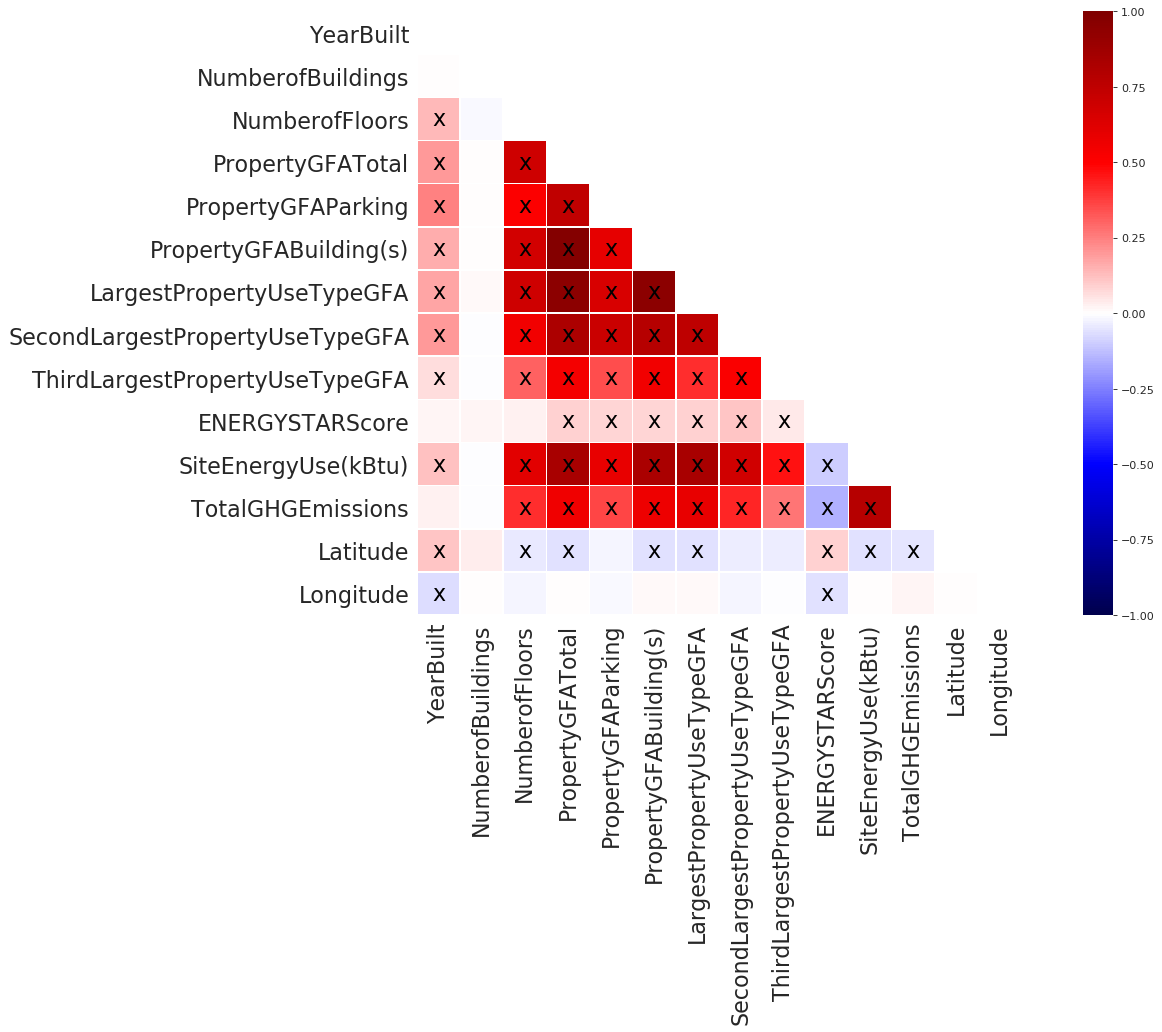

In [90]:
corMat, pValue = corMatWithPValues(newData.dropna(how='any'))

fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

mask = np.triu(np.ones_like(corMat, dtype=np.bool))

g = sns.heatmap(corMat, mask=mask, cmap='seismic',center=0,vmin=-1,vmax=1,square=True,
                linewidths=.5,ax=ax)

#ax.scatter(corMat.iloc[:,0],corMat.iloc[0,:], marker="x", color="black", s=100)

for j in range(len(newData.columns)):
    for i in range(len(newData.columns)):
        if pValue.iloc[i,j] < 0.05 and mask[i,j]:
            text = ax.text(i+0.5, j+0.5, 'x',horizontalalignment="center", verticalalignment="center",
                           fontsize=20,color="black")
        
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

figName = 'correlation_matrix_categories.png'
#plt.savefig(figName,bbox_inches="tight")
#corMat.head()
plt.show()

### 2.3 Analyse bivariée entre les variables quantitatives et qualitatives

In [91]:
newdata = data2015[data2015['SecondLargestPropertyUseType'] != 'unUse']


list_of_buildingType = newdata['BuildingType'].value_counts().index

SiteEnergyUse = pd.DataFrame(np.nan,index = np.arange(newdata['BuildingType'].value_counts()[0]),
                          columns=list_of_buildingType)

TotalGHGEmissions = pd.DataFrame(np.nan,index = np.arange(newdata['BuildingType'].value_counts()[0]),
                          columns=list_of_buildingType)

for idx in range(0,len(list_of_buildingType)):
    buildingType = list_of_buildingType[idx]
   
    data0 = newdata[newdata['BuildingType'] == buildingType]
    m = len(data0['SiteEnergyUse(kBtu)'])
    
    SiteEnergyUse.iloc[0:m,idx] = data0['SiteEnergyUse(kBtu)'].values
    TotalGHGEmissions.iloc[0:m,idx] = data0['TotalGHGEmissions'].values



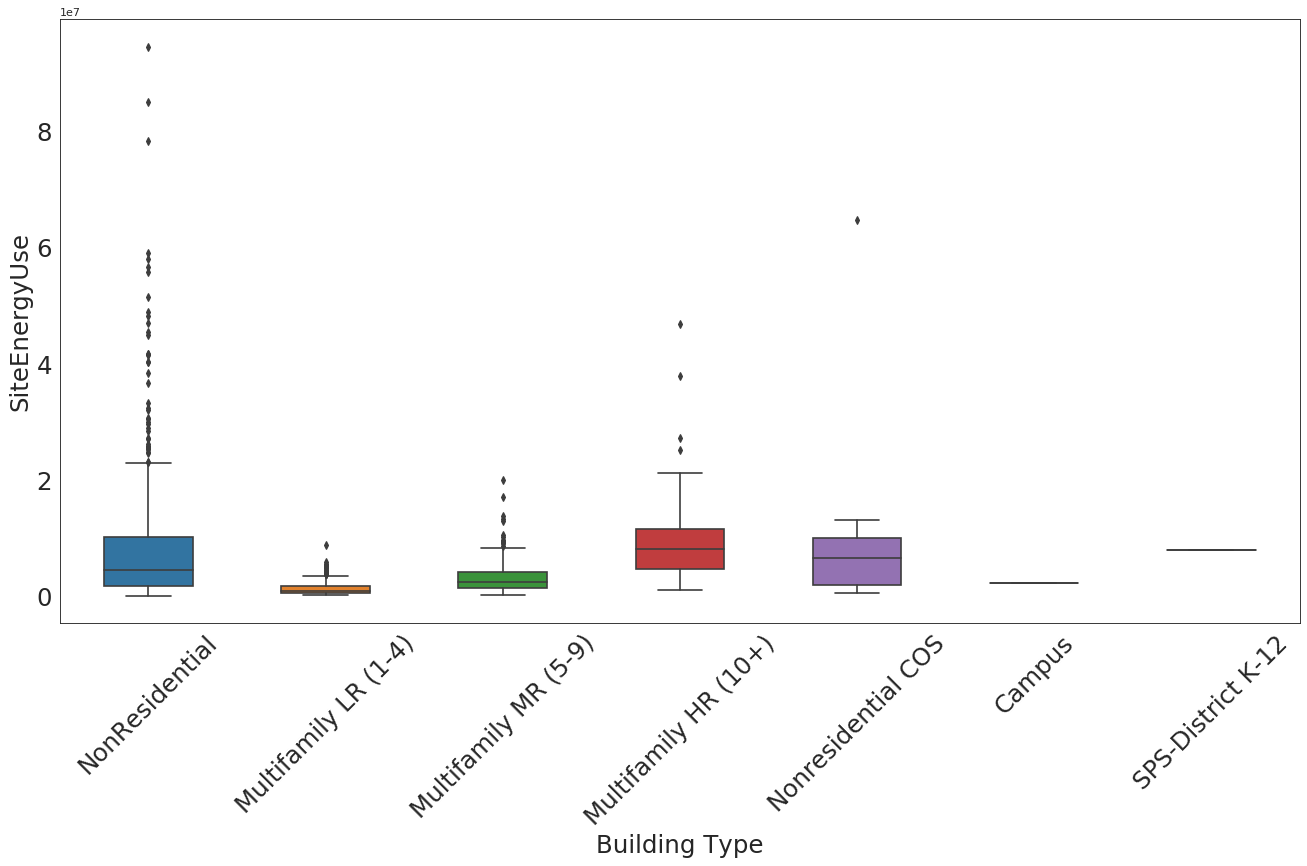

In [92]:
fig = plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

ax = sns.boxplot(x="variable",y="value",data = pd.melt(SiteEnergyUse),width=0.5)
ax.set_xticklabels(SiteEnergyUse.columns,rotation=45)

plt.xlabel('Building Type',fontsize=22)
plt.ylabel('SiteEnergyUse',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

#plt.ylim(-20,50)
figName = 'distribution_SiteEnergyUse.png'
plt.savefig(figName,bbox_inches="tight")
plt.show()

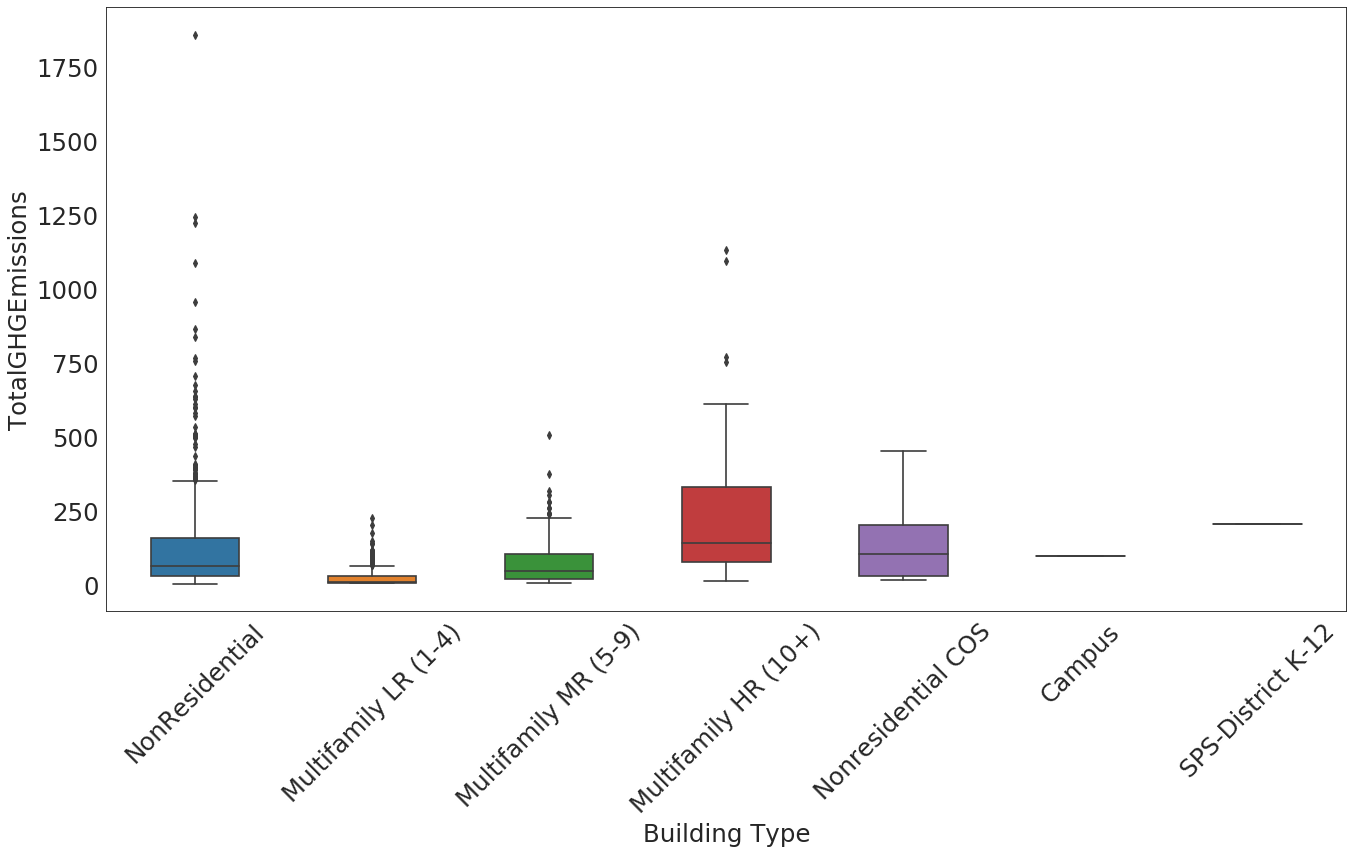

In [93]:
fig = plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

ax = sns.boxplot(x="variable",y="value",data = pd.melt(TotalGHGEmissions),width=0.5)
ax.set_xticklabels(TotalGHGEmissions.columns,rotation=45)

plt.xlabel('Building Type',fontsize=22)
plt.ylabel('TotalGHGEmissions',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

#plt.ylim(-20,50)
figName = 'distribution_TotalGHGEmissions.png'
plt.savefig(figName,bbox_inches="tight")
plt.show()

In [94]:
newdata = data2015[data2015['SecondLargestPropertyUseType'] != 'unUse']


list_of_buildingType = newdata['PrimaryPropertyType'].value_counts().index

SiteEnergyUse = pd.DataFrame(np.nan,index = np.arange(newdata['PrimaryPropertyType'].value_counts()[0]),
                          columns=list_of_buildingType)

TotalGHGEmissions = pd.DataFrame(np.nan,index = np.arange(newdata['PrimaryPropertyType'].value_counts()[0]),
                          columns=list_of_buildingType)

for idx in range(0,len(list_of_buildingType)):
    buildingType = list_of_buildingType[idx]
   
    data0 = newdata[newdata['PrimaryPropertyType'] == buildingType]
    m = len(data0['SiteEnergyUse(kBtu)'])
    
    SiteEnergyUse.iloc[0:m,idx] = data0['SiteEnergyUse(kBtu)'].values
    TotalGHGEmissions.iloc[0:m,idx] = data0['TotalGHGEmissions'].values



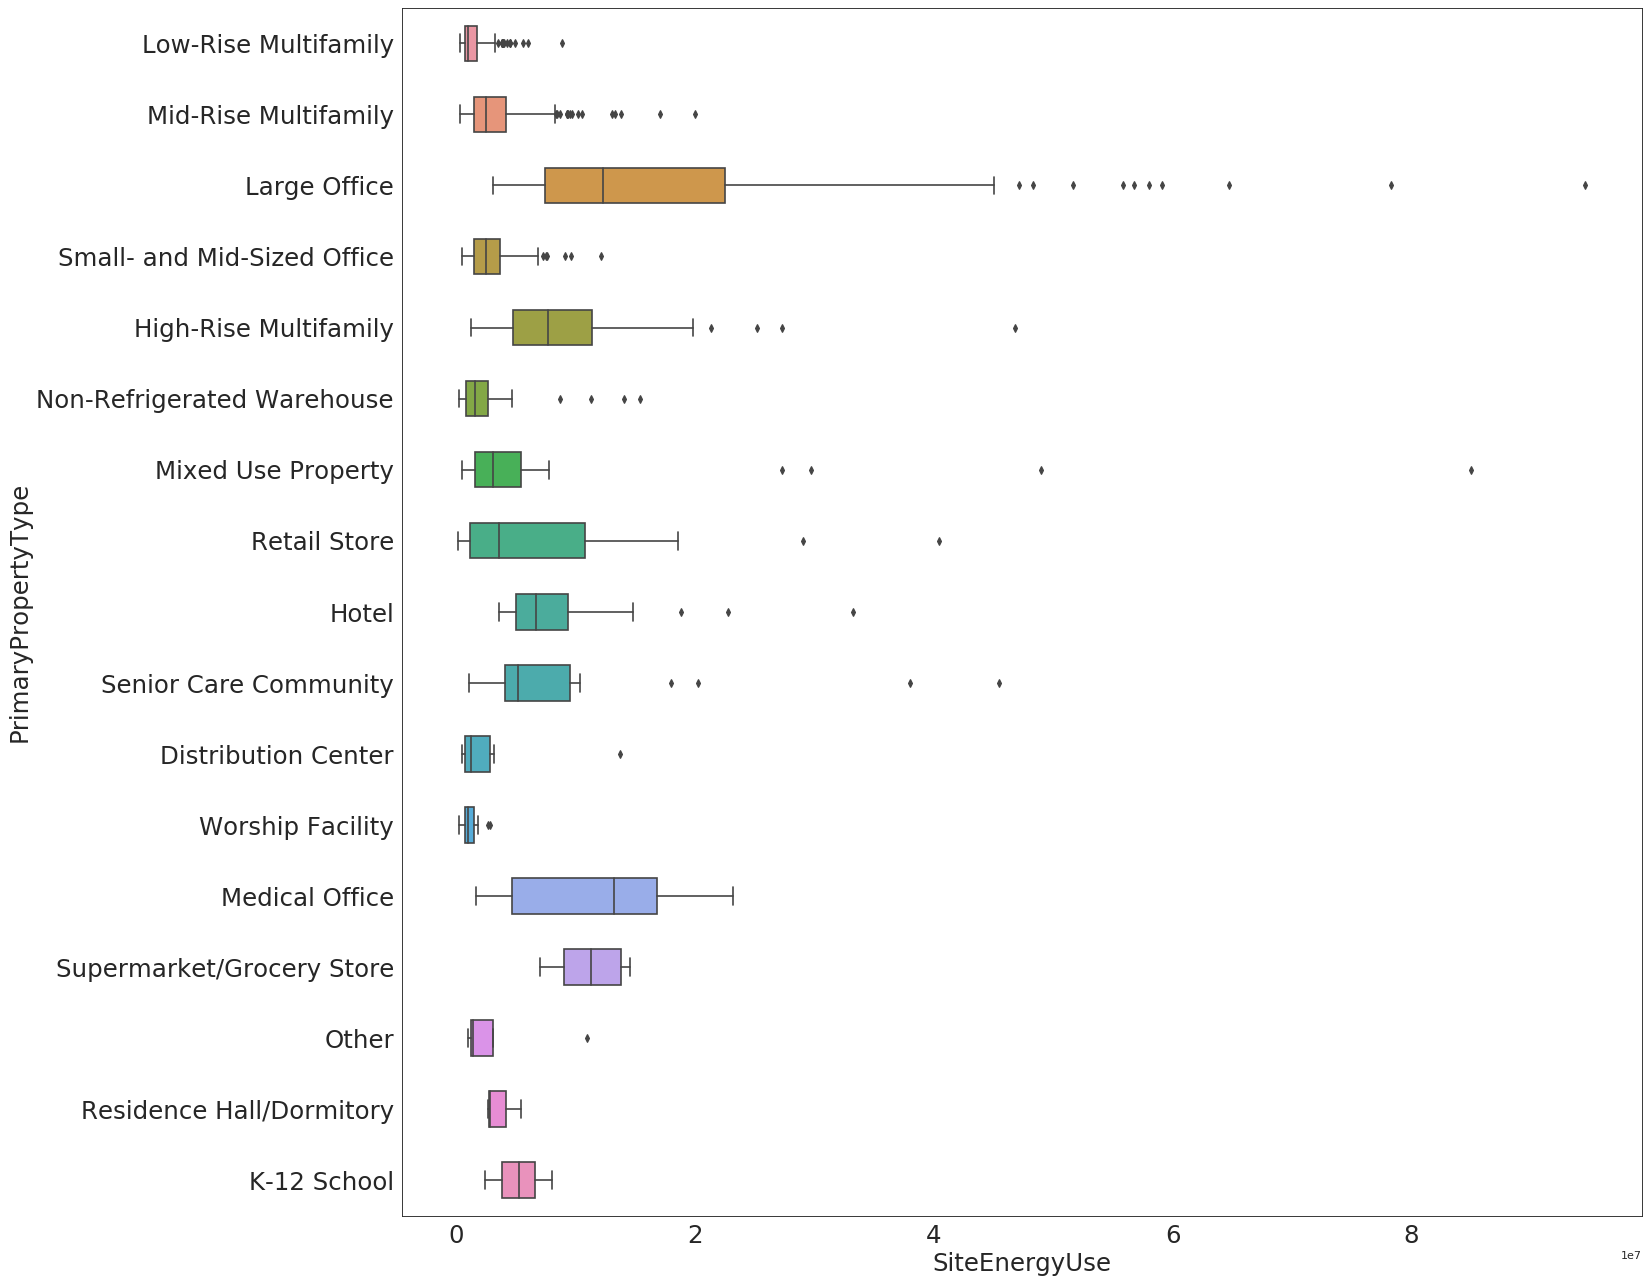

In [95]:
fig = plt.figure(figsize=(20, 20), dpi= 80, facecolor='w', edgecolor='k')

ax = sns.boxplot(x="value",y="variable",data = pd.melt(SiteEnergyUse),width=0.5)

plt.xlabel('SiteEnergyUse',fontsize=22)
plt.ylabel('PrimaryPropertyType',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.show()

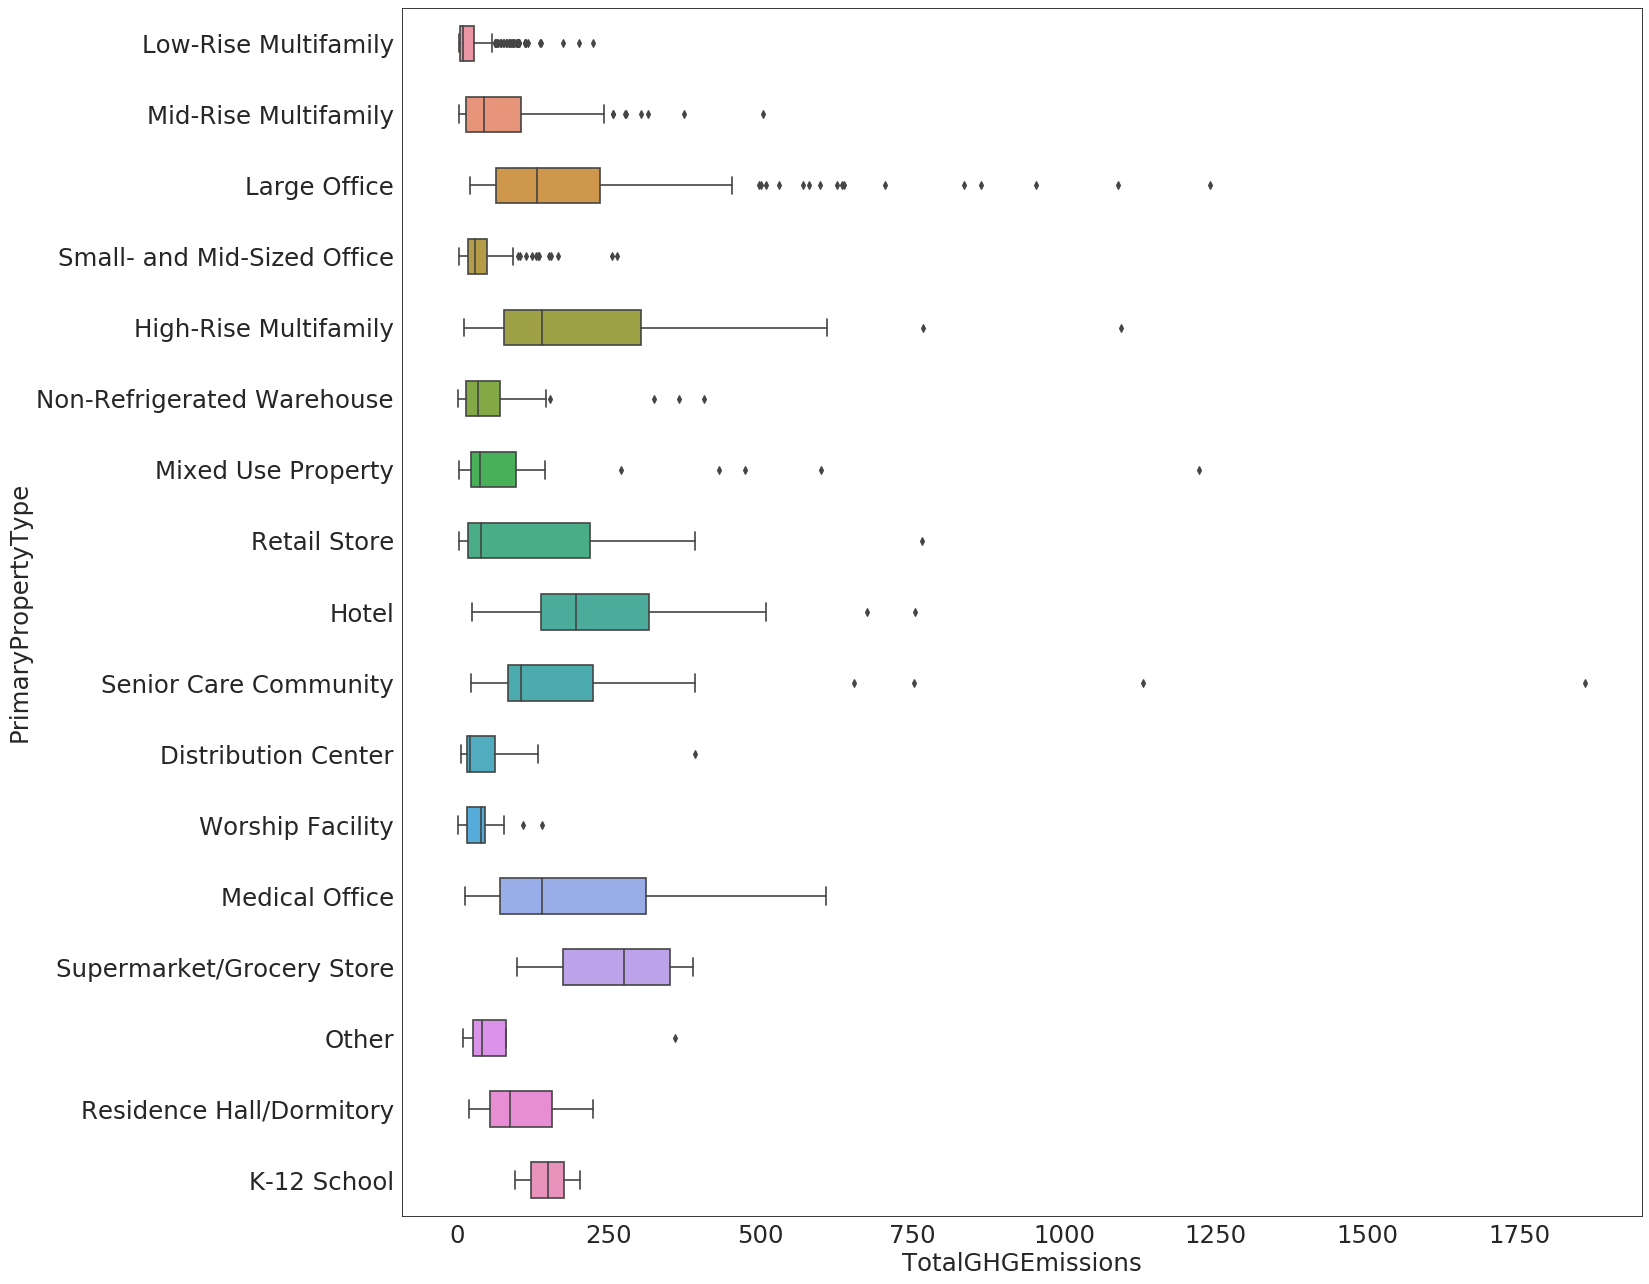

In [96]:
fig = plt.figure(figsize=(20, 20), dpi= 80, facecolor='w', edgecolor='k')

ax = sns.boxplot(x="value",y="variable",data = pd.melt(TotalGHGEmissions),width=0.5)

plt.xlabel('TotalGHGEmissions',fontsize=22)
plt.ylabel('PrimaryPropertyType',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.show()

### 2.4. Transformation des variables à prédire

Original Distribution 

count    1.037000e+03
mean     5.735069e+06
std      9.248062e+06
min      1.814910e+05
25%      1.130168e+06
50%      2.520919e+06
75%      6.175812e+06
max      9.456009e+07
Name: SiteEnergyUse(kBtu), dtype: float64
Natural Log Distribution 

count    1037.000000
mean       14.862207
std         1.126494
min        12.108961
25%        13.937877
50%        14.740134
75%        15.636151
max        18.364746
Name: SiteEnergyUse(kBtu), dtype: float64
Natural Log1p Distribution 

count    1037.000000
mean       14.862207
std         1.126494
min        12.108967
25%        13.937878
50%        14.740134
75%        15.636151
max        18.364746
Name: SiteEnergyUse(kBtu), dtype: float64
Log2 Distribution 

count    1037.000000
mean       21.441632
std         1.625188
min        17.469538
25%        20.108106
50%        21.265518
75%        22.558197
max        26.494728
Name: SiteEnergyUse(kBtu), dtype: float64
Log2p Distribution 

count    1037.000000
mean      

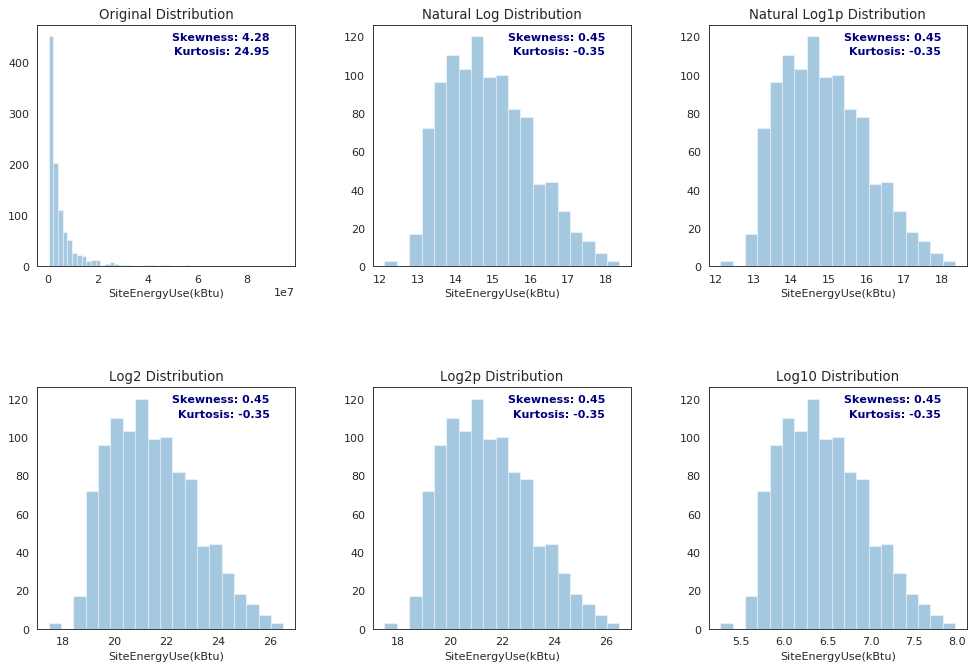

In [97]:
groups = ['Original Distribution','Natural Log Distribution', 'Natural Log1p Distribution',
          'Log2 Distribution','Log2p Distribution','Log10 Distribution']

fig,axes = plt.subplots(2,3,figsize=(15, 10), dpi= 80, facecolor='white', edgecolor='k')

for ax,group in zip(axes.flatten(),groups):
    if (group == 'Original Distribution'):
        testData = newdata['SiteEnergyUse(kBtu)']
        
    if (group == 'Natural Log Distribution'):
        testData = np.log(newdata['SiteEnergyUse(kBtu)'])
        
    if (group == 'Natural Log1p Distribution'):
        testData = np.log1p(newdata['SiteEnergyUse(kBtu)'])
        
    if (group == 'Log2 Distribution'):
        testData = np.log2(newdata['SiteEnergyUse(kBtu)'])
        
    if (group == 'Log2p Distribution'):
        testData = np.log2(1+newdata['SiteEnergyUse(kBtu)'])
        
    if (group == 'Log10 Distribution'):
        testData = np.log10(newdata['SiteEnergyUse(kBtu)'])
    
    print(group,'\n')
    print(testData.describe())
    
    sns.distplot(testData,kde=False,ax=ax)
    ax.set_title(group)

    ax.text(x=0.90, y=0.97, transform=ax.transAxes, s="Skewness: %.2f" % testData.skew(),\
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='navy')
    ax.text(x=0.90, y=0.91, transform=ax.transAxes, s="Kurtosis: %.2f" % testData.kurt(),\
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='navy')
    

plt.subplots_adjust(hspace=0.5,wspace=0.3)
plt.show()

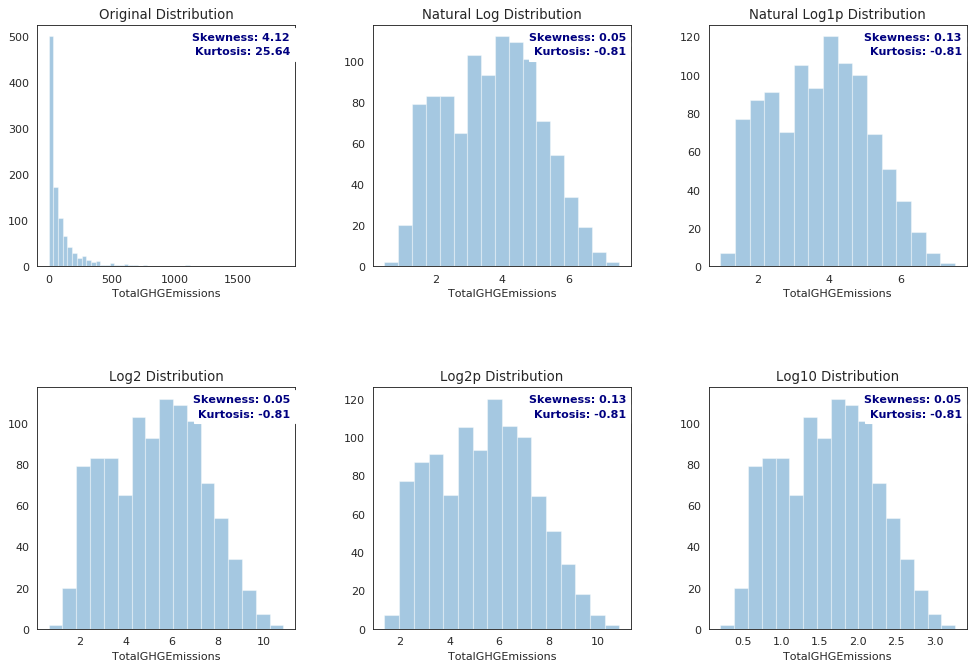

In [98]:
groups = ['Original Distribution','Natural Log Distribution', 'Natural Log1p Distribution',
          'Log2 Distribution','Log2p Distribution','Log10 Distribution']

fig,axes = plt.subplots(2,3,figsize=(15, 10), dpi= 80, facecolor='white', edgecolor='k')

for ax,group in zip(axes.flatten(),groups):
    if (group == 'Original Distribution'):
        testData = newdata['TotalGHGEmissions']
        
    if (group == 'Natural Log Distribution'):
        testData = np.log(newdata['TotalGHGEmissions'])
        
    if (group == 'Natural Log1p Distribution'):
        testData = np.log1p(newdata['TotalGHGEmissions'])
        
    if (group == 'Log2 Distribution'):
        testData = np.log2(newdata['TotalGHGEmissions'])
        
    if (group == 'Log2p Distribution'):
        testData = np.log2(1+newdata['TotalGHGEmissions'])
        
    if (group == 'Log10 Distribution'):
        testData = np.log10(newdata['TotalGHGEmissions'])
        
    sns.distplot(testData,kde=False,ax=ax)
    ax.set_title(group)

    ax.text(x=0.98, y=0.97, transform=ax.transAxes, s="Skewness: %.2f" % testData.skew(),\
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='navy')
    ax.text(x=0.98, y=0.91, transform=ax.transAxes, s="Kurtosis: %.2f" % testData.kurt(),\
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='navy')
    

plt.subplots_adjust(hspace=0.5,wspace=0.3)
plt.show()

#### Ajout des variables après transformation

In [99]:
data2015.min()

OSEBuildingID                                        1
DataYear                                          2015
BuildingType                                    Campus
PrimaryPropertyType                Distribution Center
Neighborhood                                   BALLARD
YearBuilt                                         1900
NumberofBuildings                                    1
NumberofFloors                                       0
PropertyGFATotal                                 20000
PropertyGFAParking                                   0
PropertyGFABuilding(s)                            5236
LargestPropertyUseType                     Bank Branch
LargestPropertyUseTypeGFA                         8061
SecondLargestPropertyUseType           Adult Education
SecondLargestPropertyUseTypeGFA                      0
ThirdLargestPropertyUseType                Bank Branch
ThirdLargestPropertyUseTypeGFA                       0
ENERGYSTARScore                                      1
SiteEnergy

In [100]:
data2016.min()

OSEBuildingID                                        1
DataYear                                          2016
BuildingType                                    Campus
PrimaryPropertyType                Distribution Center
Neighborhood                                   BALLARD
Latitude                                       47.4992
Longitude                                     -122.414
YearBuilt                                         1900
NumberofBuildings                                    0
NumberofFloors                                       0
PropertyGFATotal                                 12294
PropertyGFAParking                                   0
PropertyGFABuilding(s)                            3636
LargestPropertyUseType                     Bank Branch
LargestPropertyUseTypeGFA                         8061
SecondLargestPropertyUseType           Adult Education
SecondLargestPropertyUseTypeGFA                      0
ThirdLargestPropertyUseType                Bank Branch
ThirdLarge

In [101]:
data2015['Log-SiteEnergyUse(kBtu)'] = np.log(data2015['SiteEnergyUse(kBtu)'])
data2015['Log-TotalGHGEmissions'] = np.log(data2015['TotalGHGEmissions'])
                                           
data2016['Log-SiteEnergyUse(kBtu)'] = np.log(data2016['SiteEnergyUse(kBtu)'])
data2016['Log-TotalGHGEmissions'] = np.log(data2016['TotalGHGEmissions'])

In [102]:
data2015.to_csv('data_2015.csv')
data2016.to_csv('data_2016.csv')

In [103]:
data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude,Log-SiteEnergyUse(kBtu),Log-TotalGHGEmissions
0,1,2015,NonResidential,Hotel,DOWNTOWN,1927,1,12.0,88434,0,...,0.0,unUse,0.0,65.0,6981428.0,249.43,47.612190,-122.337997,15.758764,5.519178
1,2,2015,NonResidential,Hotel,DOWNTOWN,1996,1,11.0,103566,15064,...,15064.0,Restaurant,4622.0,51.0,8354235.0,263.51,47.613106,-122.333358,15.938279,5.574091
3,5,2015,NonResidential,Hotel,DOWNTOWN,1926,1,10.0,61320,0,...,0.0,unUse,0.0,1.0,28229320.0,1936.34,47.614216,-122.336609,17.155872,7.568555
4,8,2015,NonResidential,Hotel,DOWNTOWN,1980,1,18.0,119890,12460,...,68009.0,Swimming Pool,0.0,67.0,14829099.0,507.70,47.613754,-122.340924,16.512102,6.229891
6,10,2015,NonResidential,Hotel,DOWNTOWN,1926,1,11.0,83008,0,...,0.0,unUse,0.0,25.0,6252842.0,208.46,47.614114,-122.332741,15.648547,5.339747
